In [6]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualisation
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

# Stats packages
import statsmodels.api as sm

# For Machine Learning
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [11]:
df_train = pd.read_csv("Data\df_train.csv")
df_train

,QuoteRef,Channel,Product,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
0,JPCI-25,Direct,Level,1.0,1,32.0,20,14.37,493.28,1,588.0,5.0,65.0,4.0,6,2.0,2.0,0.0,NaN
1,QBRV-99,CTM,Level with CI,1.0,0,52.0,30,16.10,439.61,1,564.0,3.0,61.0,22.0,11,3.0,10.0,0.0,NaN
2,QRQZ-49,CTM,Level,1.0,1,35.0,30,32.12,779.30,1,527.0,1.0,NaN,7.0,20,8.0,9.0,0.0,NaN
3,PCCH-10,CTM,Level,1.0,1,51.0,20,46.67,1116.68,0,567.0,0.0,NaN,5.0,12,3.0,4.0,0.0,NaN
4,TJDU-89,Direct,Level,0.0,0,41.0,20,17.72,391.30,1,558.0,3.0,NaN,8.0,9,4.0,4.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,UGJP-85,MSM,Level with CI,0.0,0,35.0,10,12.99,186.63,0,538.0,1.0,12.0,3.0,23,6.0,6.0,0.0,NaN
2191,CWYG-97,CTM,Level with CI,0.0,0,47.0,25,13.58,147.81,0,545.0,2.0,NaN,10.0,13,6.0,10.0,0.0,NaN
2192,DDOJ-55,CTM,Level with CI,1.0,0,44.0,20,14.74,325.14,0,544.0,4.0,NaN,5.0,19,6.0,10.0,0.0,NaN
2193,LLQP-49,Direct,Level,1.0,0,41.0,20,14.50,423.40,0,560.0,3.0,17.0,8.0,17,5.0,5.0,0.0,NaN


In [12]:
numeric_feats = [
    "Person1 Age",
    "Term",
    "TotalPremium",
    "WGB (No. of other addresses held)",
    "JF (Score)",
    "X (Months same person on ER at current address)",
    "EF (No. of people not same surname at current address)",
    "BB (Number of CCJs)",
    "ND (Months since last CCJ)",
    "NBC"
]

categorical_feats = [
    "Channel",
    "Product",
    "NOB (Property group)",
    "URB (Income group)",
    "LSB (Regional banded house price band)",
] 

binary_feats = [
    "Smoker",
    "Joint?",
    "Sold"
]


all_feats = numeric_feats + categorical_feats + binary_feats
print(len(all_feats))

set(df_train.columns) - set(all_feats)

18


{'QuoteRef'}

In [13]:
simple_imputer = ColumnTransformer(
    [
        ("numeric", SimpleImputer(strategy="median", add_indicator=True), numeric_feats),
        ("categorical", SimpleImputer(strategy="constant", fill_value="missing"), categorical_feats),
        ("binary", SimpleImputer(strategy="most_frequent", add_indicator=True), binary_feats)
    ],
    remainder="drop",  
    verbose_feature_names_out=False 
).set_output(transform="pandas")

encoder = ColumnTransformer(
    transformers = [
        ('pass', 'passthrough', numeric_feats + binary_feats),
        ('ordinal', ce.OneHotEncoder(handle_missing="return_nan"), categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
).set_output(transform="pandas")

scaler = StandardScaler().set_output(transform="pandas")

prep_pipeline = Pipeline(
    [
        ("imputation", simple_imputer),
        ("encoding", encoder),
        ("scaling", scaler)
    ]
)


df_train = prep_pipeline.fit_transform(df_train)
df_train

,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
0,-1.482499,-0.066367,-0.502818,1.266683,1.509812,0.976867,-0.545732,-0.141691,0.023738,-0.319374,...,-0.260013,-0.221890,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
1,0.948372,1.049923,-0.454577,0.261851,0.365972,0.856774,2.947201,-0.141691,0.023738,-0.374167,...,3.845955,-0.221890,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
2,-1.117868,1.049923,-0.007857,-0.742980,-1.397447,-0.254082,0.036423,-0.141691,0.023738,-0.027367,...,-0.260013,4.506737,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
3,0.826828,-0.066367,0.397871,-1.245396,0.508952,-0.254082,-0.351680,-0.141691,0.023738,0.317075,...,-0.260013,-0.221890,3.484783,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
4,-0.388607,-0.066367,-0.409403,0.261851,0.080012,-0.254082,0.230475,-0.141691,0.023738,-0.423488,...,-0.260013,-0.221890,3.484783,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,-1.117868,-1.182657,-0.541299,-0.742980,-0.873187,-0.614360,-0.739784,-0.141691,0.023738,-0.632442,...,-0.260013,-0.221890,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,3.175824
2191,0.340654,0.491778,-0.524847,-0.240565,-0.539568,-0.254082,0.618579,-0.141691,0.023738,-0.672075,...,3.845955,-0.221890,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
2192,-0.023976,-0.066367,-0.492500,0.764267,-0.587228,-0.254082,-0.351680,-0.141691,0.023738,-0.491033,...,3.845955,-0.221890,-0.286962,-0.252952,-0.238354,-0.308722,-0.611925,-0.279454,-0.316624,-0.314879
2193,-0.388607,-0.066367,-0.499193,0.261851,0.175332,-0.464244,0.230475,-0.141691,0.023738,-0.390716,...,-0.260013,-0.221890,-0.286962,-0.252952,-0.238354,3.239158,-0.611925,-0.279454,-0.316624,-0.314879


c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

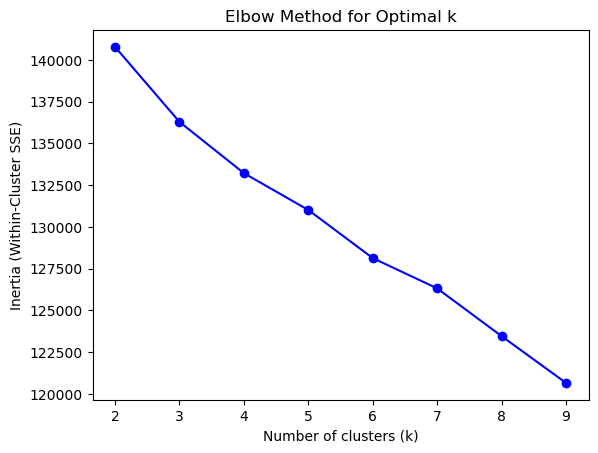

In [14]:
inertias = []
K_range = range(2, 10)  # Try k values from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_train)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [19]:
# 1. Initialize the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# 2. Fit the model and get cluster labels
cluster_labels = kmeans.fit_predict(df_train)

# 3. Add cluster labels to your DataFrame
df_train['Cluster'] = cluster_labels

# Optional: inspect cluster assignments
print(df_train['Cluster'].value_counts())

Cluster
2    598
3    511
5    389
4    303
0    215
1    179
Name: count, dtype: int64


c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
cluster_means_scaled = (
    df_train
    .groupby("Cluster")
    .mean()
)

cluster_means_scaled

,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.052215,-0.074698,-0.141052,-0.098088,0.021682,-0.051986,-0.082325,0.116196,0.123577,-0.176034,...,0.168968,-0.151313,0.275985,-0.252952,-0.172178,0.114905,-0.611925,0.353927,0.046430,0.831322
1,-0.140559,0.110189,0.090571,-0.660953,0.240014,0.177577,-0.022980,-0.141691,0.023738,0.145386,...,-0.260013,-0.173639,0.713705,-0.252952,-0.147869,-0.200114,-0.611925,0.114206,-0.174789,1.430473
2,0.024261,0.006889,0.524846,0.294822,0.737720,0.158361,0.038849,-0.101194,0.089200,0.525769,...,-0.144533,-0.118451,-0.098375,1.271824,-0.238354,0.201286,-0.611925,0.021942,-0.023425,-0.085802
3,0.027896,-0.036008,-0.073807,0.034818,-1.625577,0.052054,0.127360,0.671622,-0.542656,-0.080310,...,1.595403,0.312306,-0.034460,-0.252952,0.410946,-0.100897,-0.611925,-0.053470,-0.258466,-0.227246
4,-0.030388,-0.026042,-0.185870,0.117234,0.062741,0.059990,0.103629,-0.042617,0.087529,-0.207758,...,-0.189383,0.141433,0.141252,-0.175772,0.168416,0.175450,-0.611925,0.158538,0.313011,0.085431
5,0.037303,0.038926,0.020605,-0.222951,0.121466,-0.215939,-0.209462,-0.141691,0.023738,0.049515,...,-0.260013,-0.221890,-0.286962,-0.252952,-0.238354,-0.302799,1.630438,-0.279454,-0.316624,-0.314879


In [ ]:
scaler_step = prep_pipeline.named_steps["scaling"]

cluster_means_unscaled_array = scaler_step.inverse_transform(cluster_means_scaled)

cluster_means_unscaled = pd.DataFrame(
    cluster_means_unscaled_array,
    columns=cluster_means_scaled.columns,
    index=cluster_means_scaled.index
)

cluster_means_unscaled


,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,44.626866,19.925373,27.343433,2.283582,556.776119,30.731343,6.388060,0.059701,36.783582,633.680746,...,0.104478,1.492537e-02,0.149254,6.938894e-18,1.492537e-02,0.119403,0.000000,0.164179,1.044776e-01,0.328358
1,43.040816,21.581633,35.649796,1.163265,561.357143,38.377551,6.693878,0.000000,36.500000,948.511224,...,0.000000,1.020408e-02,0.265306,6.938894e-18,2.040816e-02,0.030612,0.000000,0.102041,4.081633e-02,0.500000
2,44.396875,20.656250,51.223531,3.065625,571.800000,37.737500,7.012500,0.009375,36.685938,1321.095750,...,0.028125,2.187500e-02,0.050000,3.625000e-01,0.000000e+00,0.143750,0.000000,0.078125,8.437500e-02,0.065625
3,44.426778,20.271967,29.754937,2.548117,522.213389,34.196653,7.468619,0.188285,34.891213,727.442092,...,0.451883,1.129707e-01,0.066946,6.938894e-18,1.464435e-01,0.058577,0.000000,0.058577,1.673640e-02,0.025105
4,43.947248,20.361239,25.736204,2.712156,557.637615,34.461009,7.346330,0.022936,36.681193,602.607454,...,0.017202,7.683486e-02,0.113532,1.834862e-02,9.174312e-02,0.136468,0.000000,0.113532,1.811927e-01,0.114679
5,44.504174,20.943239,33.140701,2.035058,558.869783,25.270451,5.732888,0.000000,36.500000,854.605509,...,0.000000,6.938894e-18,0.000000,6.938894e-18,6.938894e-18,0.001669,0.998331,0.000000,1.387779e-17,0.000000


In [ ]:
cluster_means_unscaled.to_csv("Data\cluster_means_unscaled.csv")

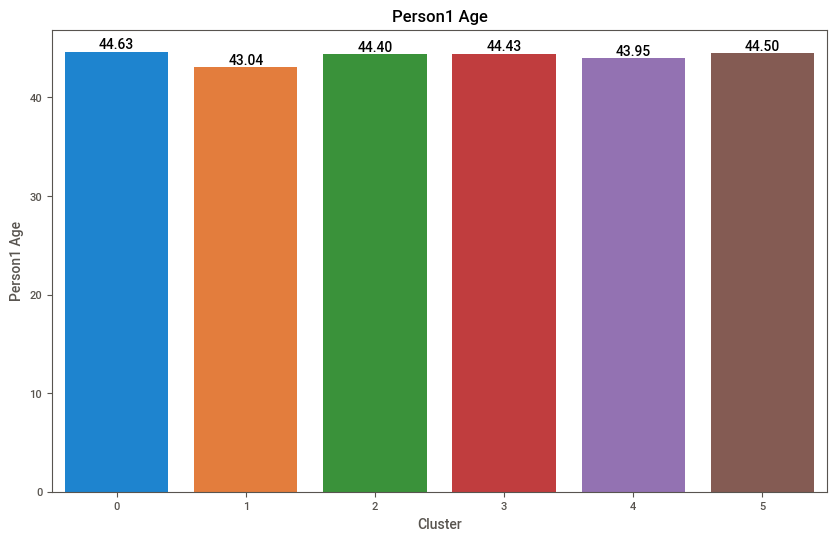

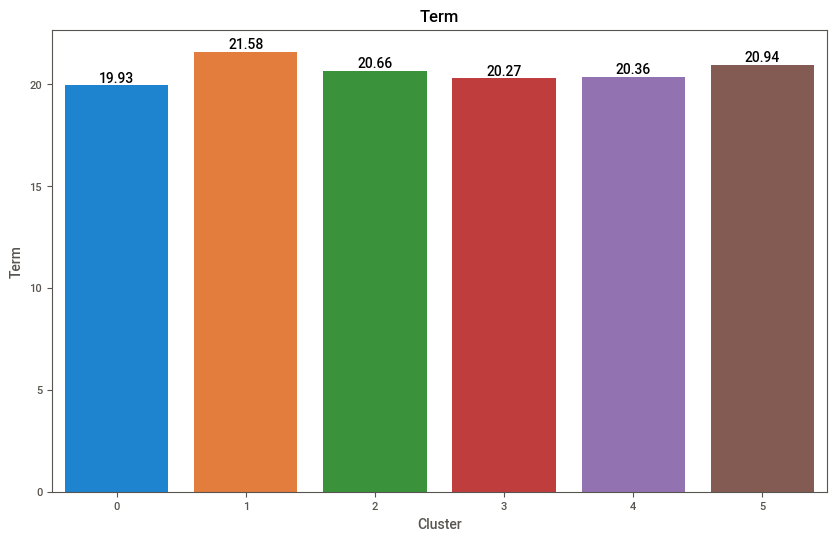

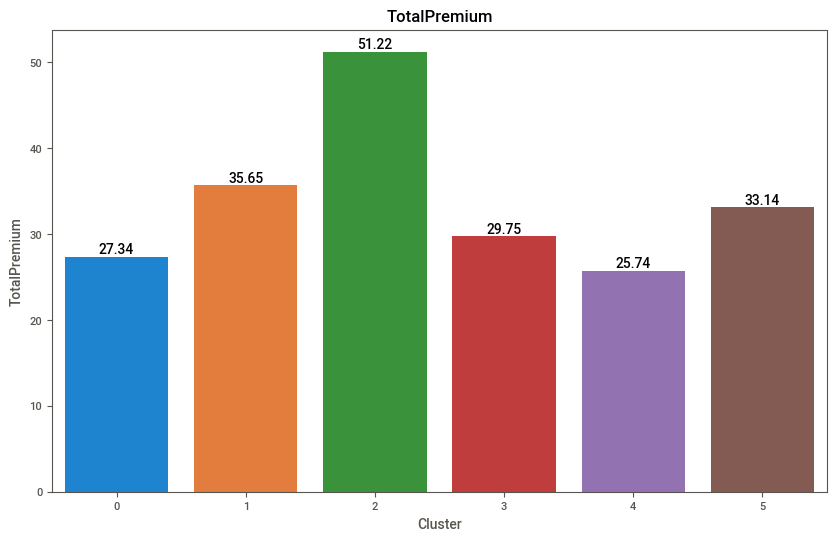

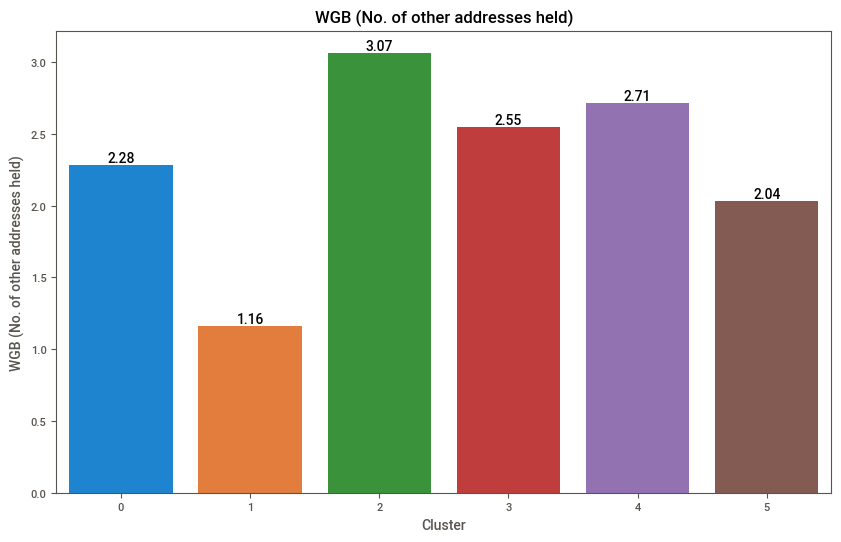

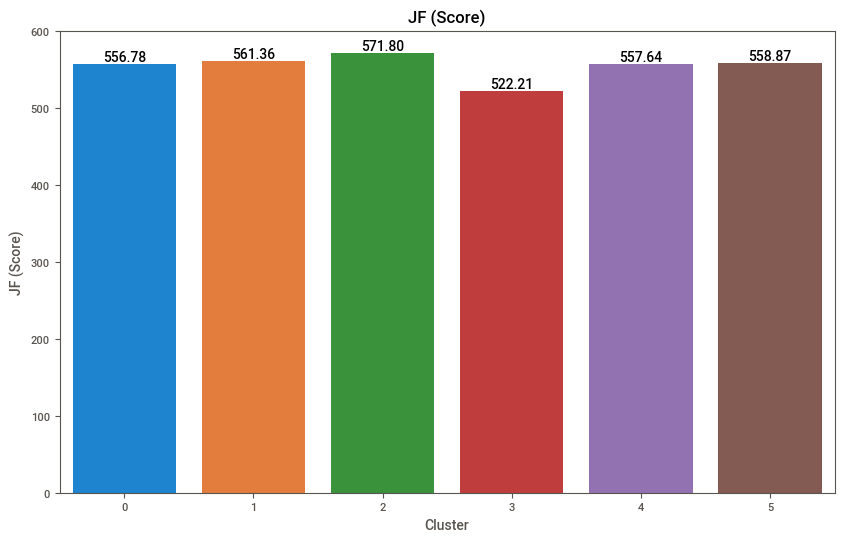

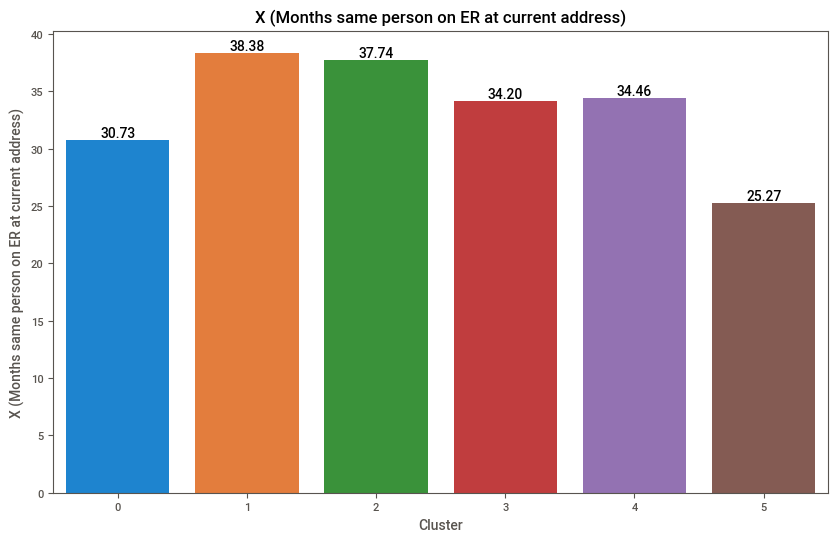

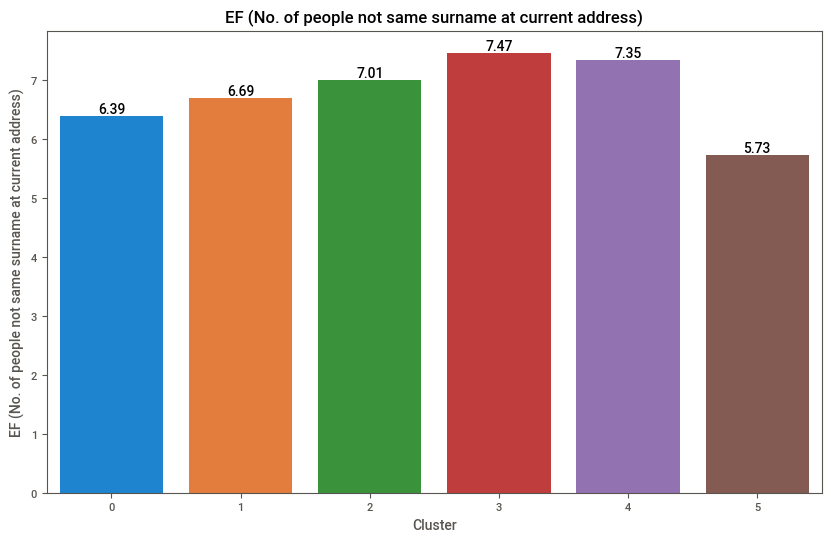

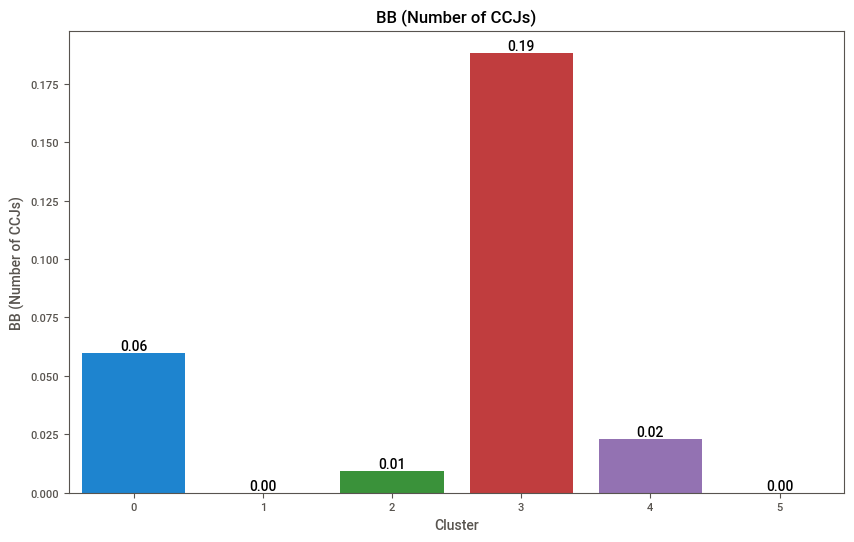

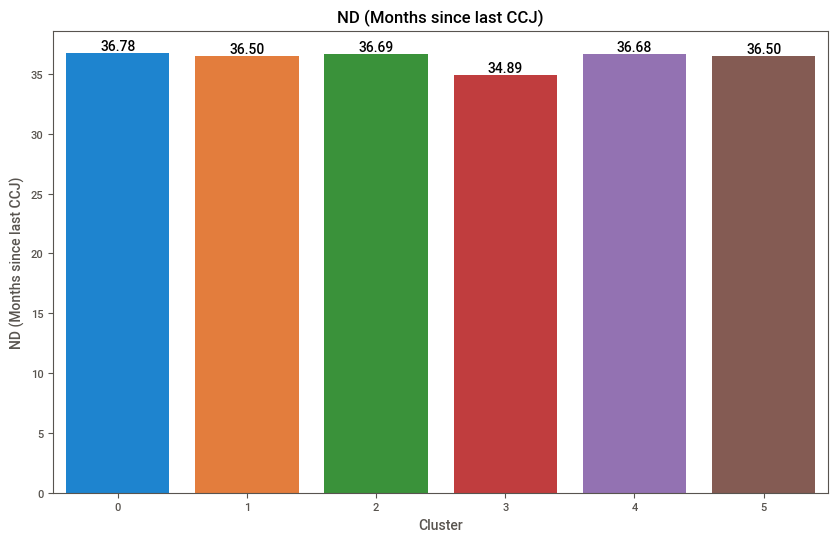

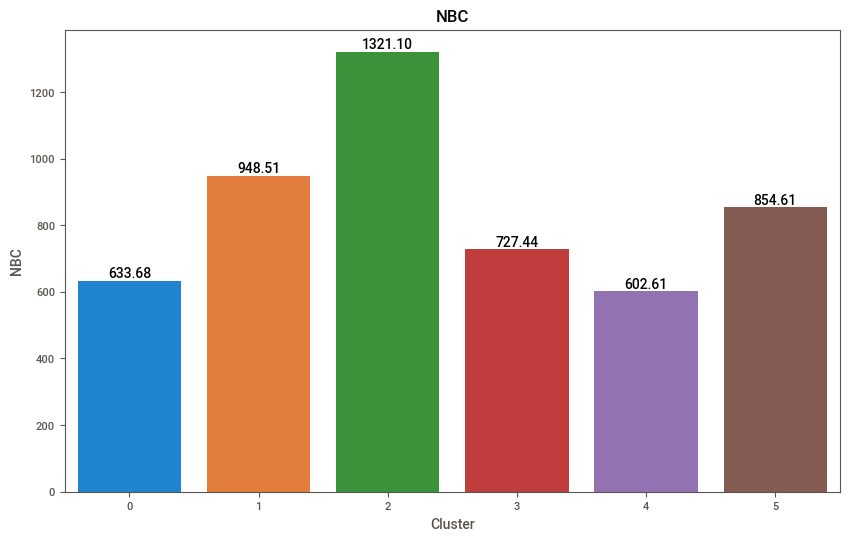

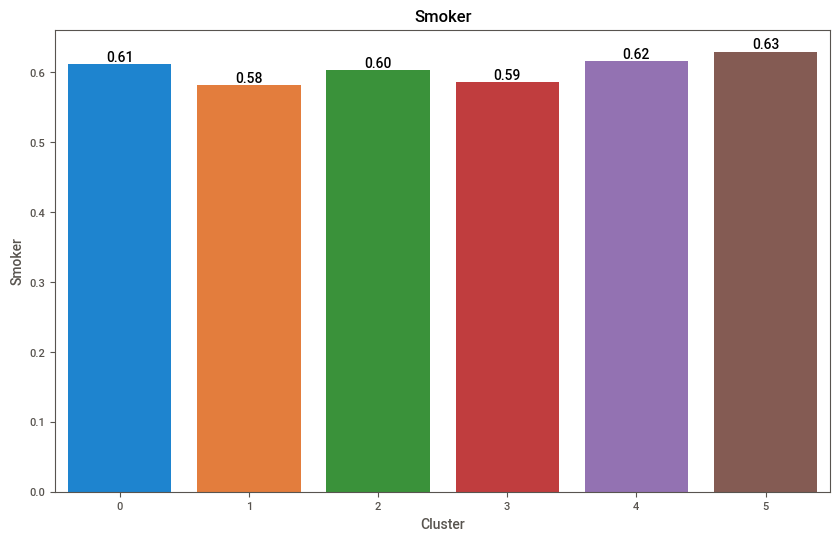

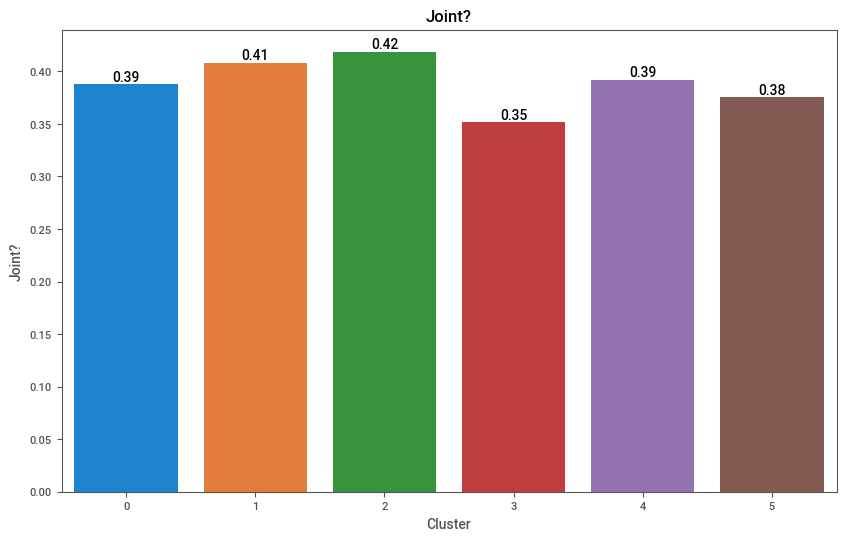

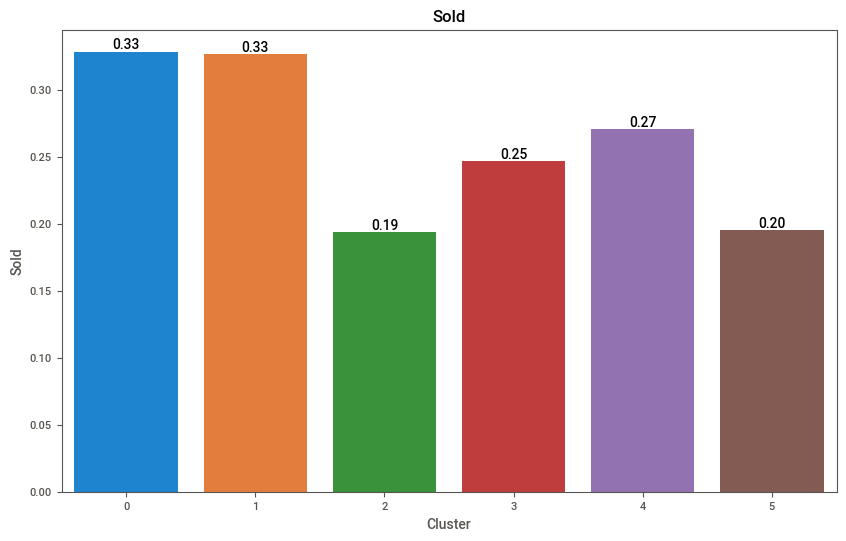

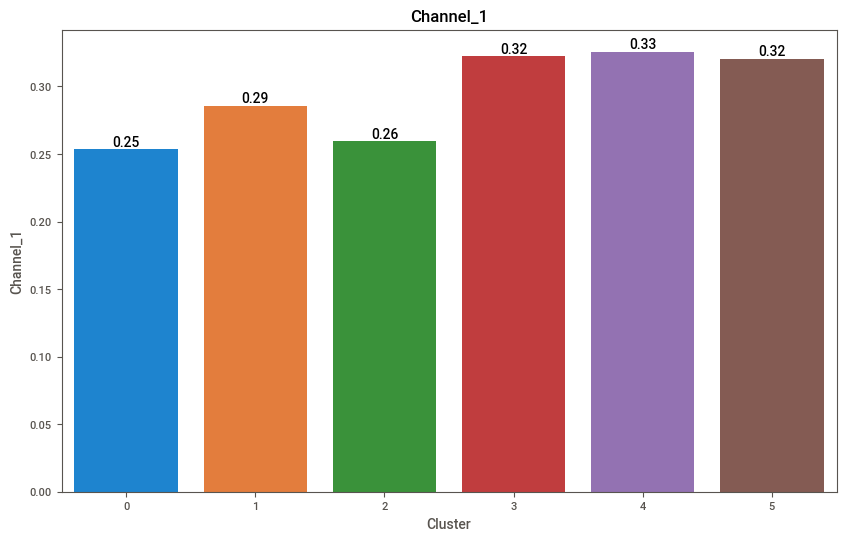

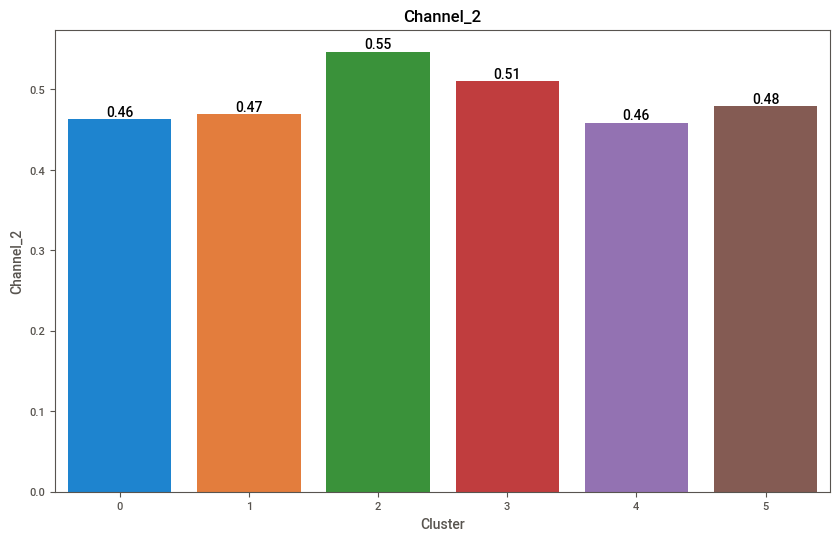

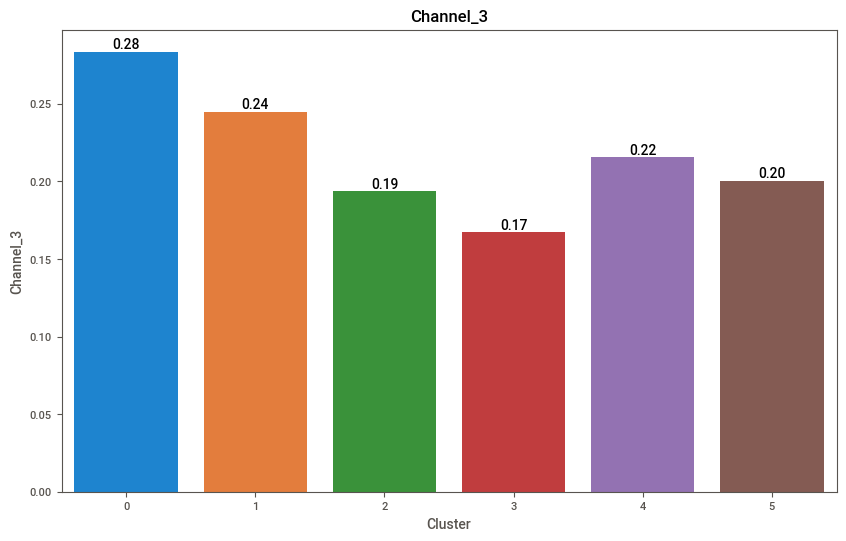

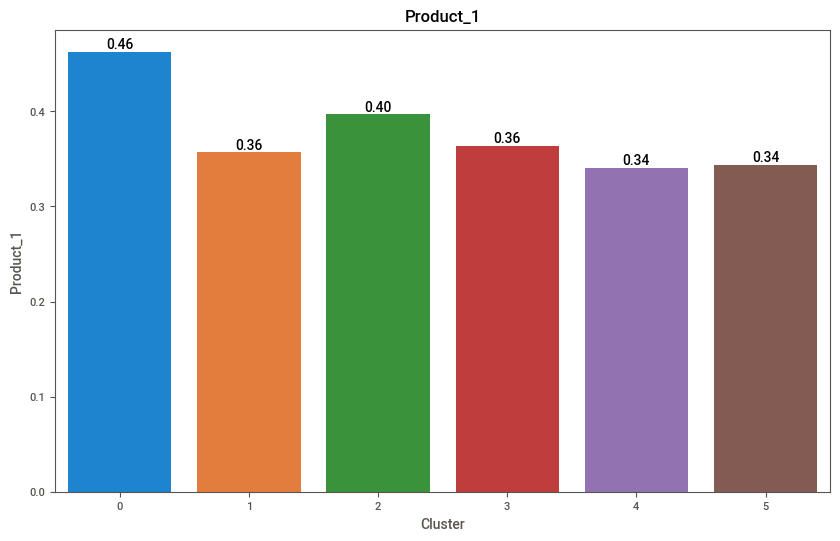

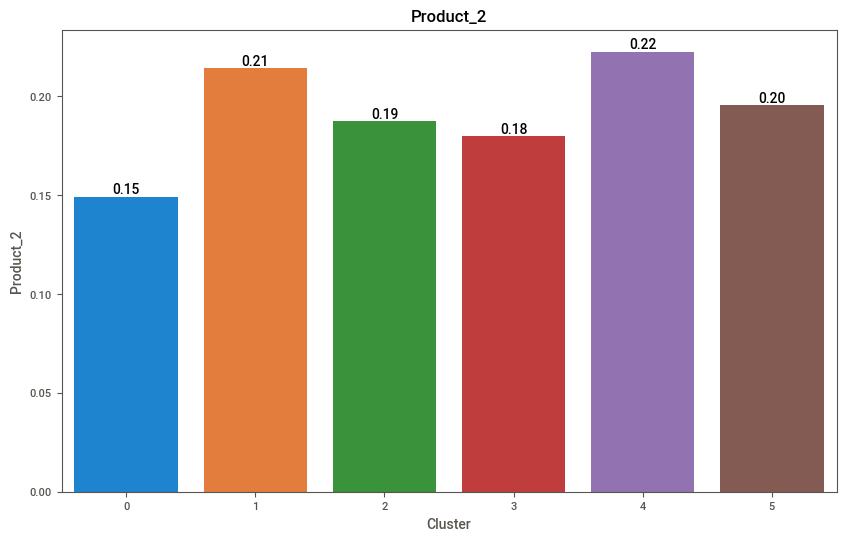

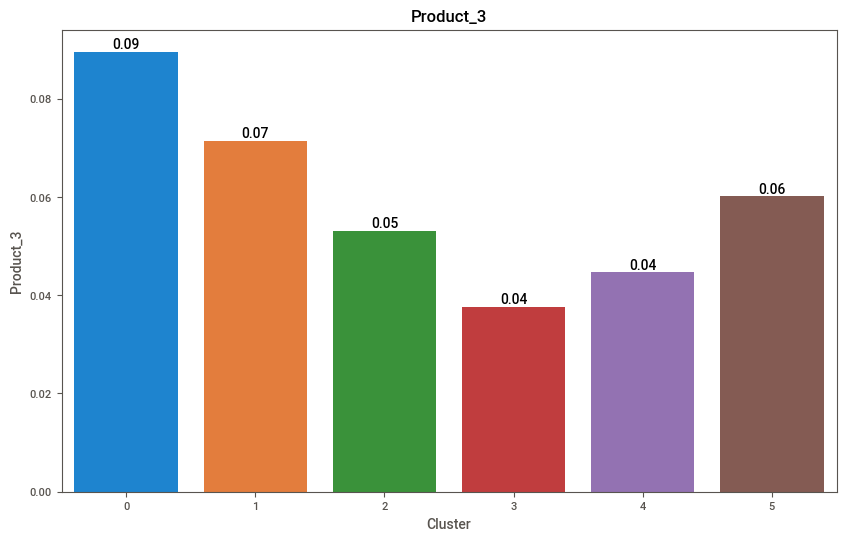

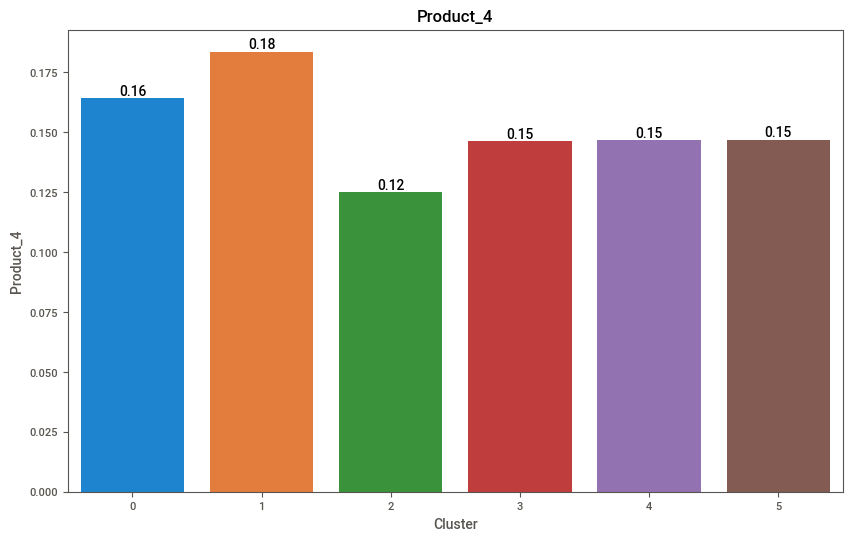

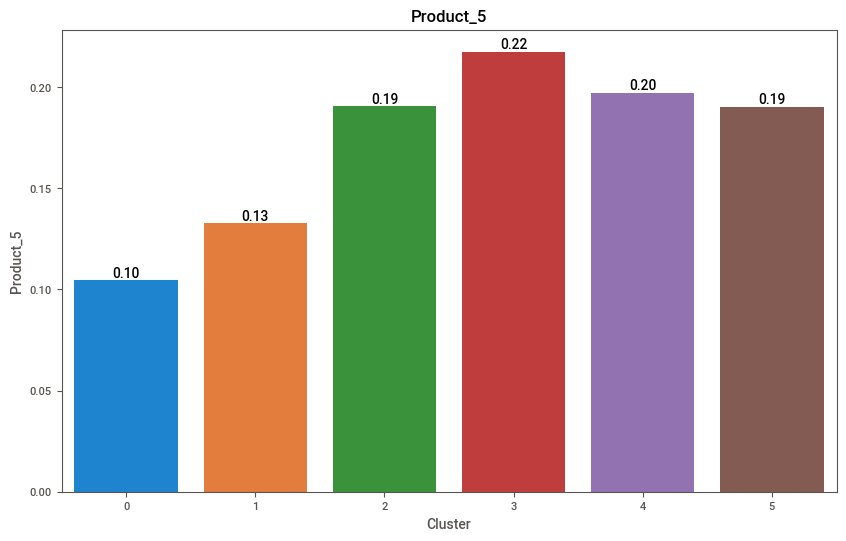

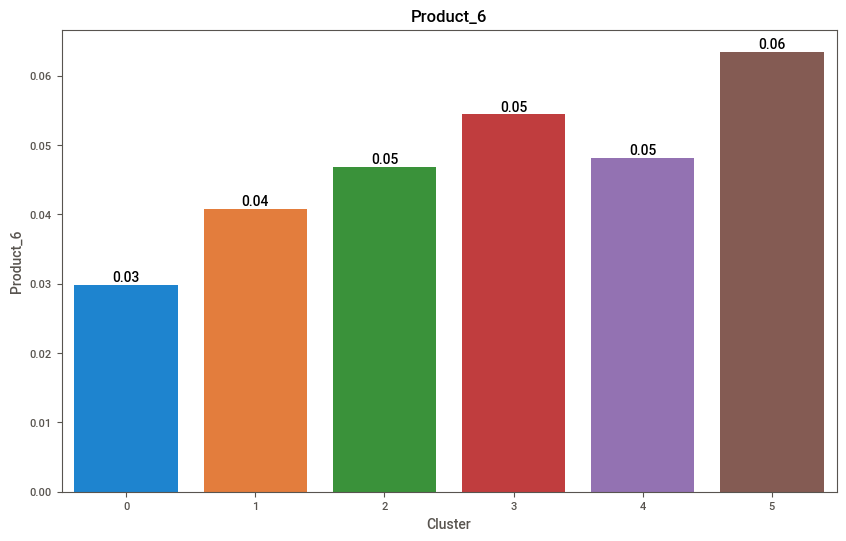

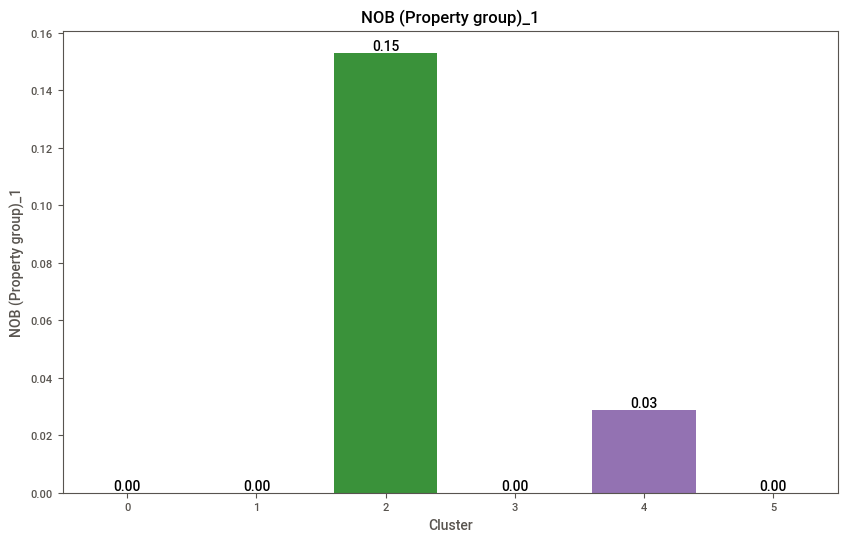

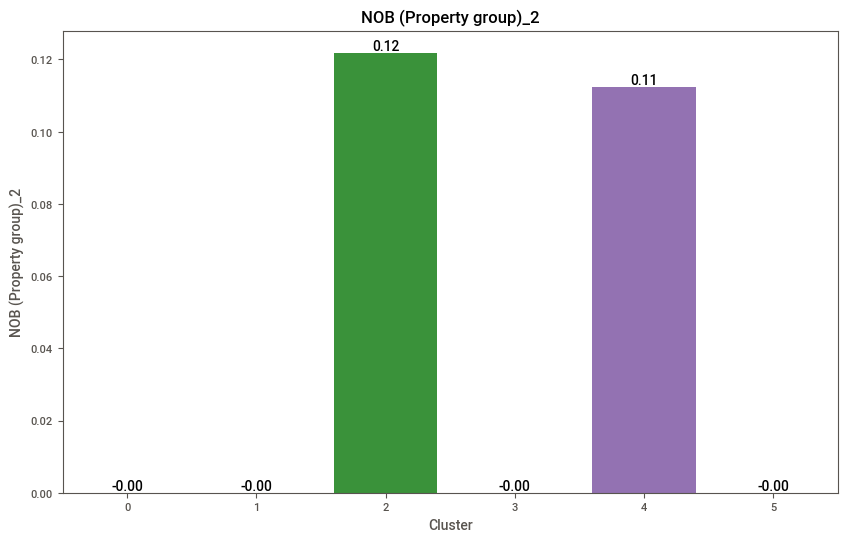

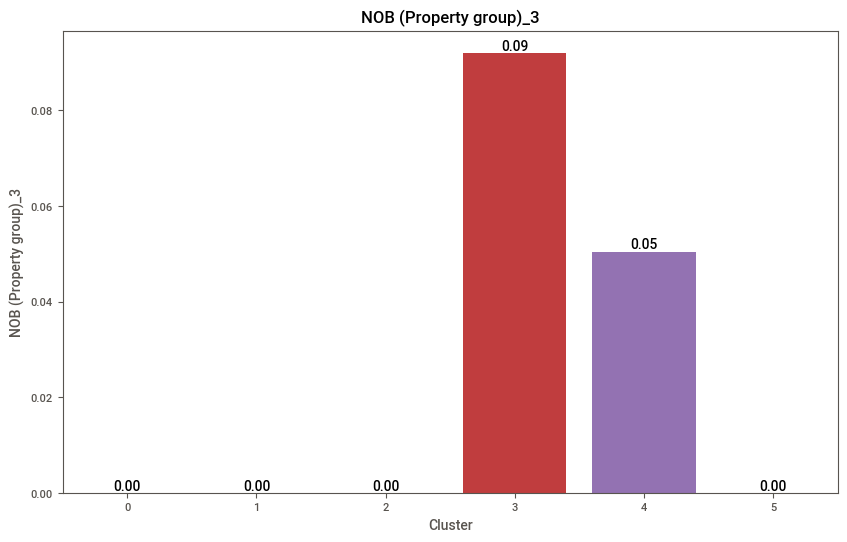

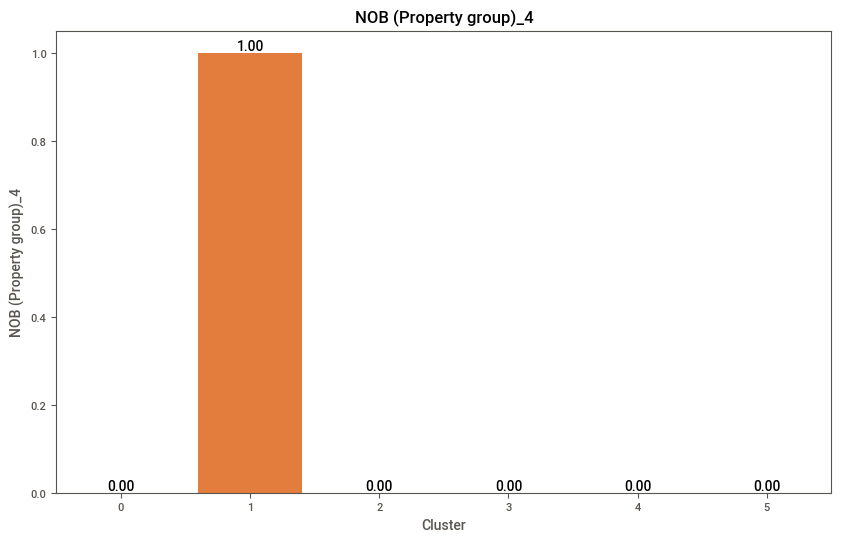

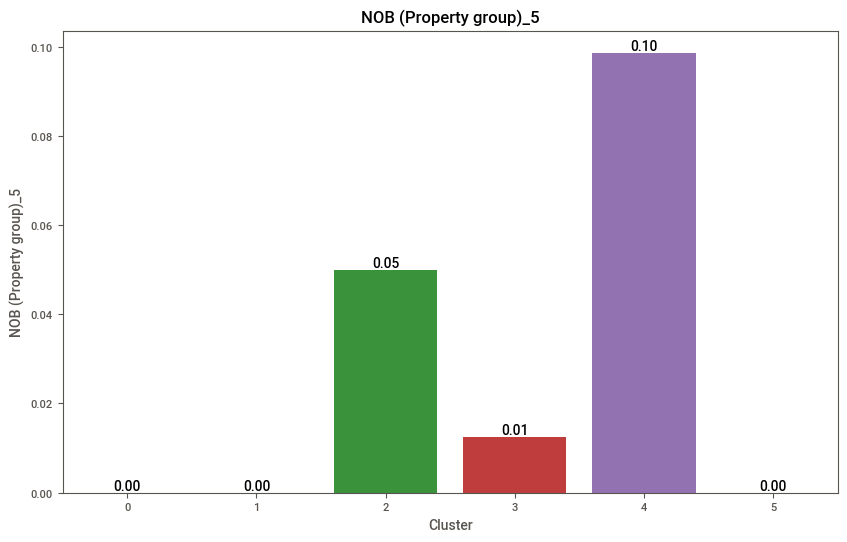

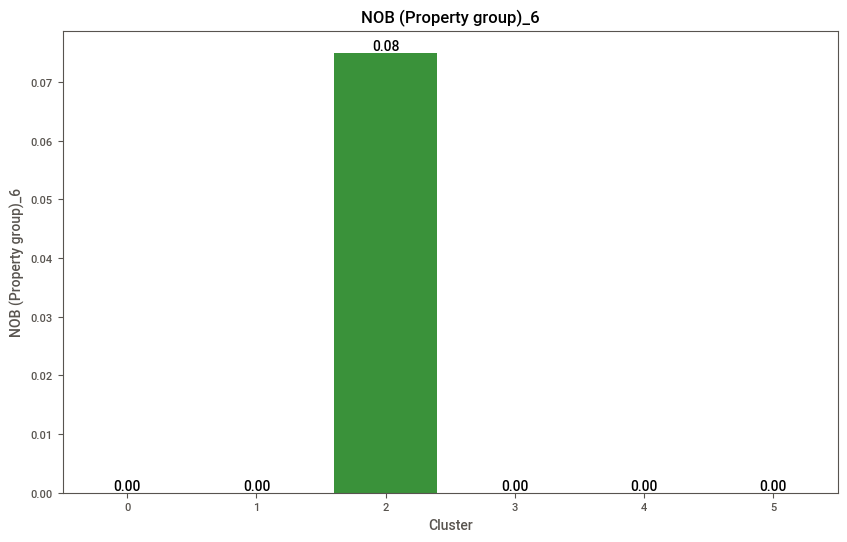

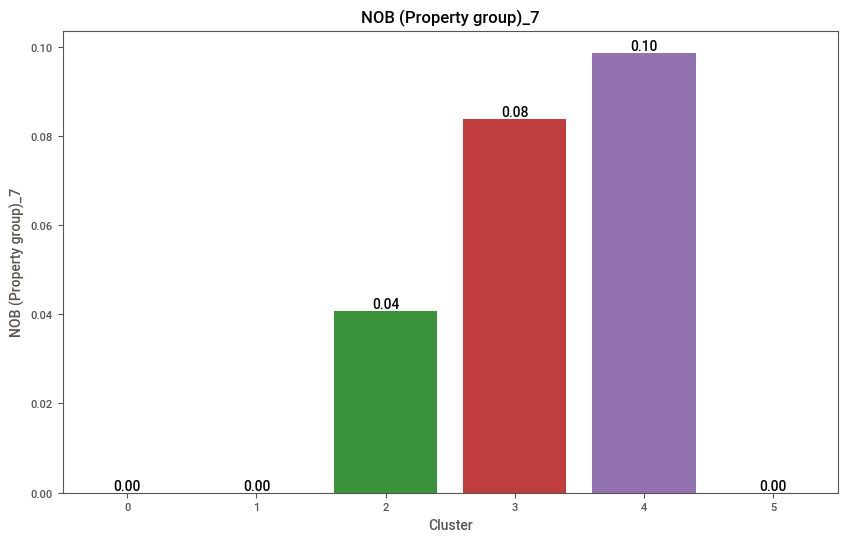

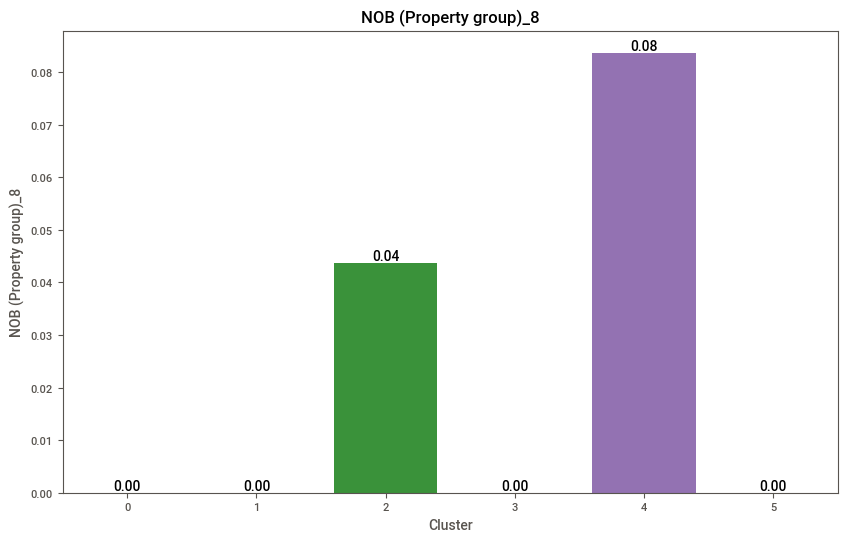

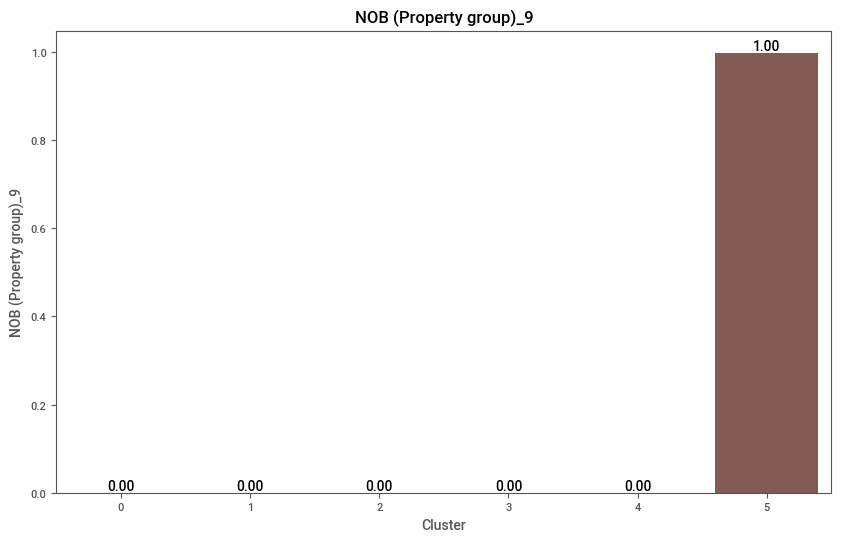

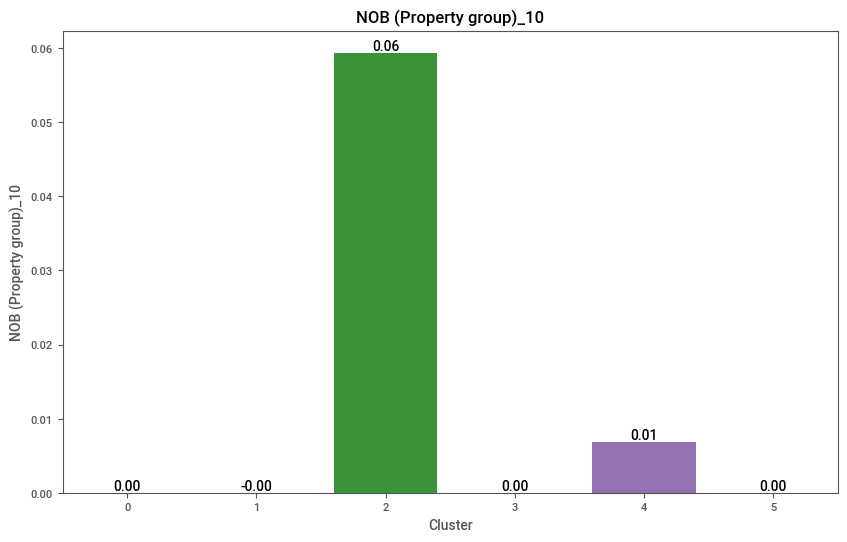

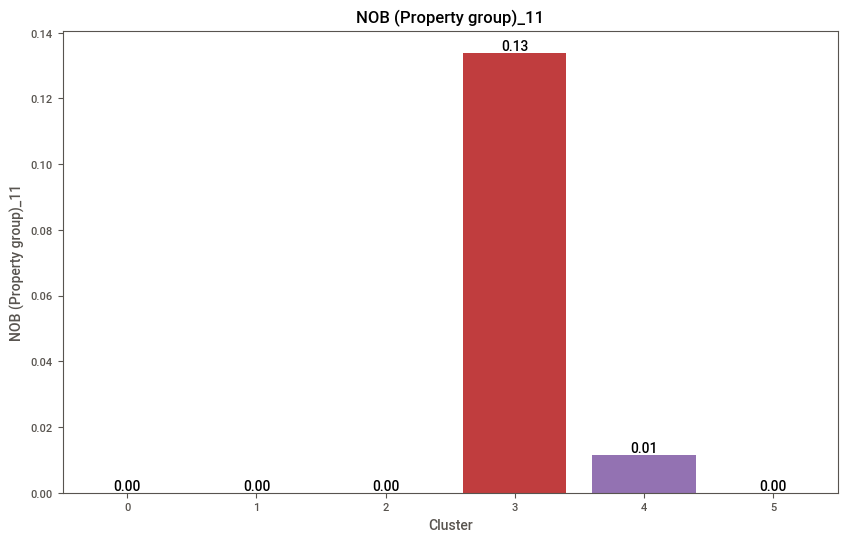

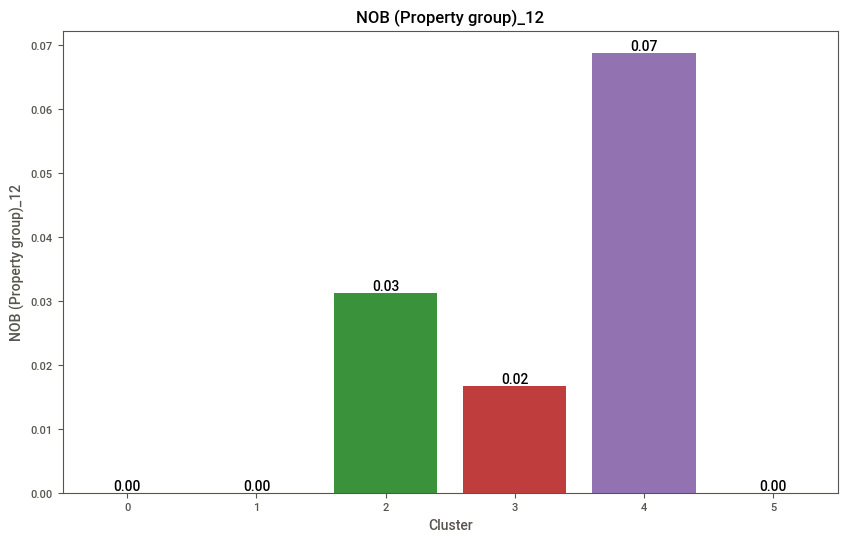

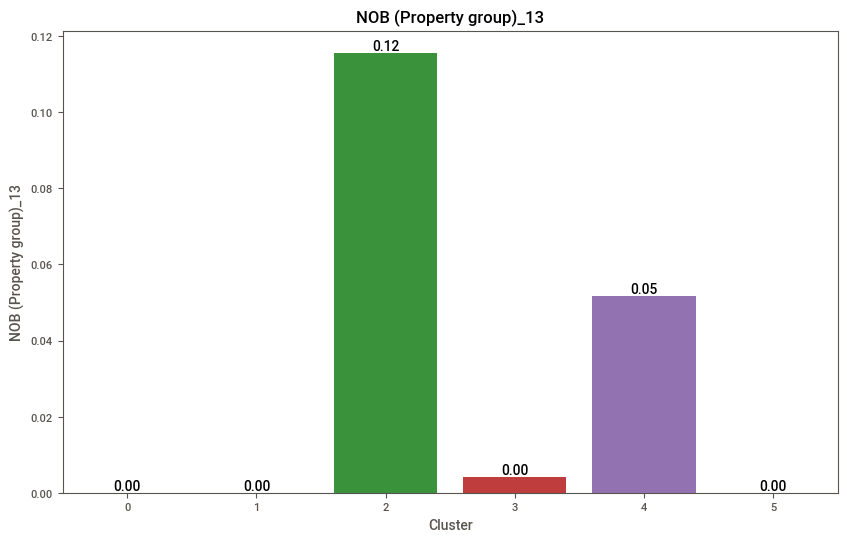

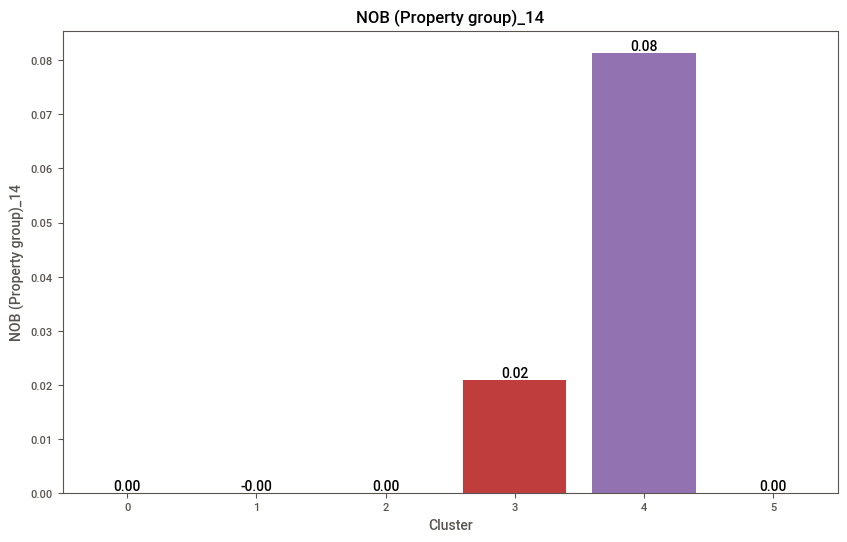

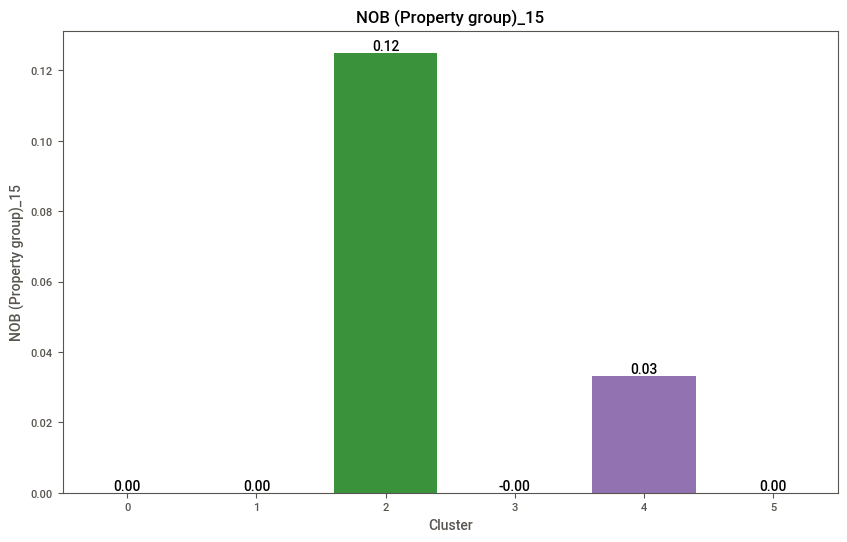

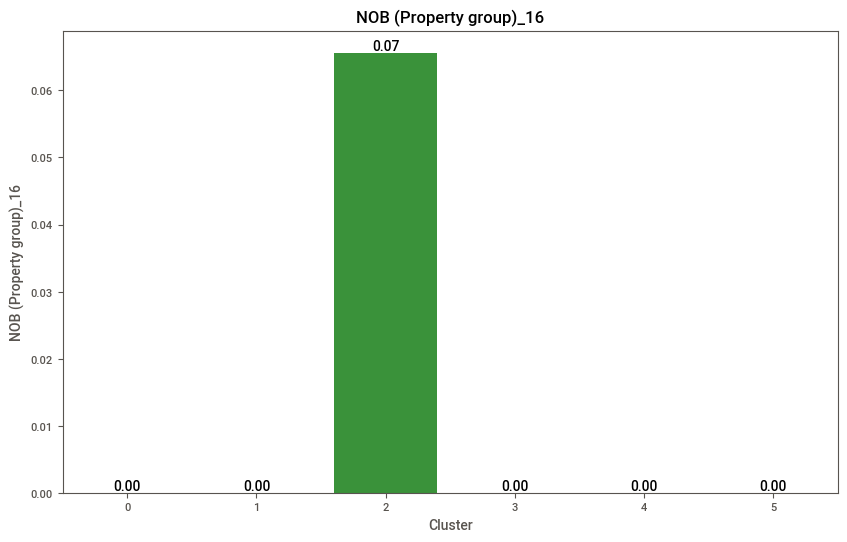

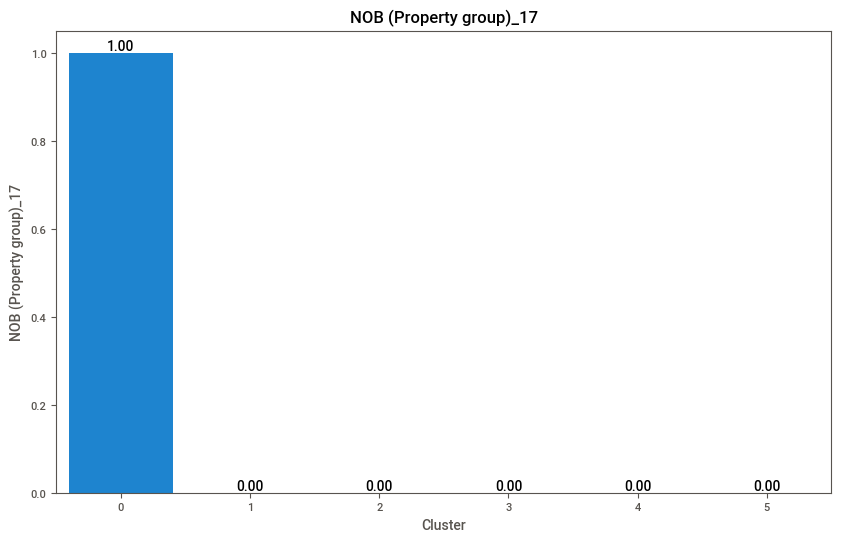

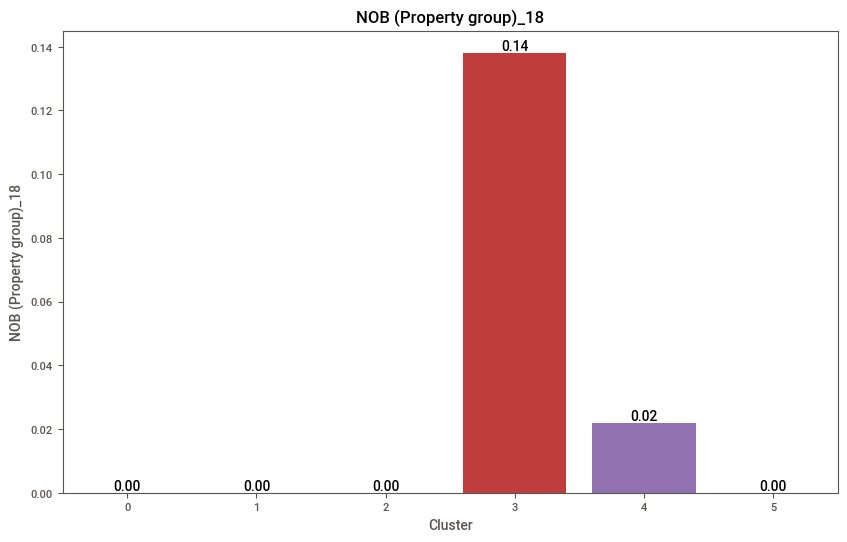

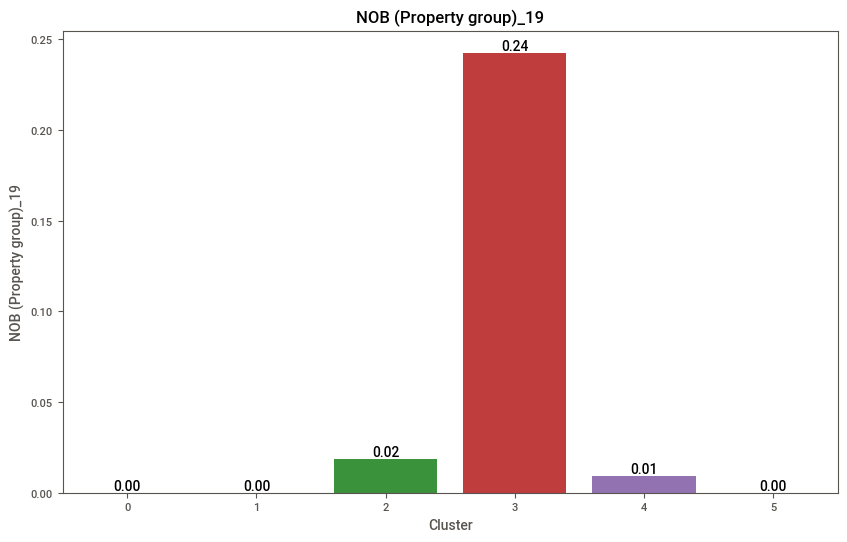

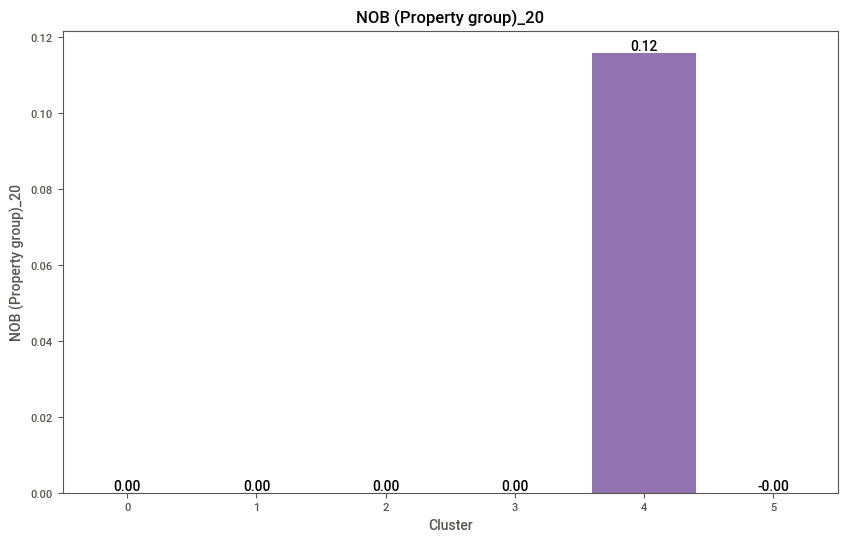

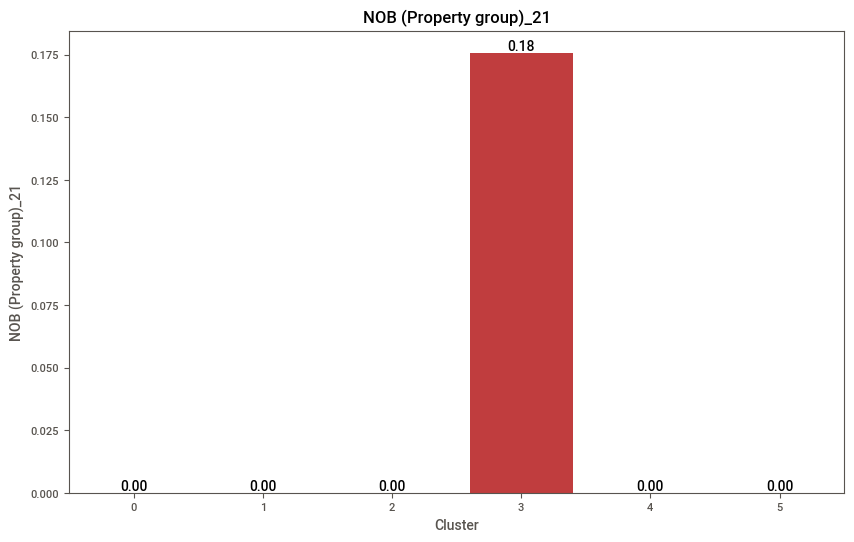

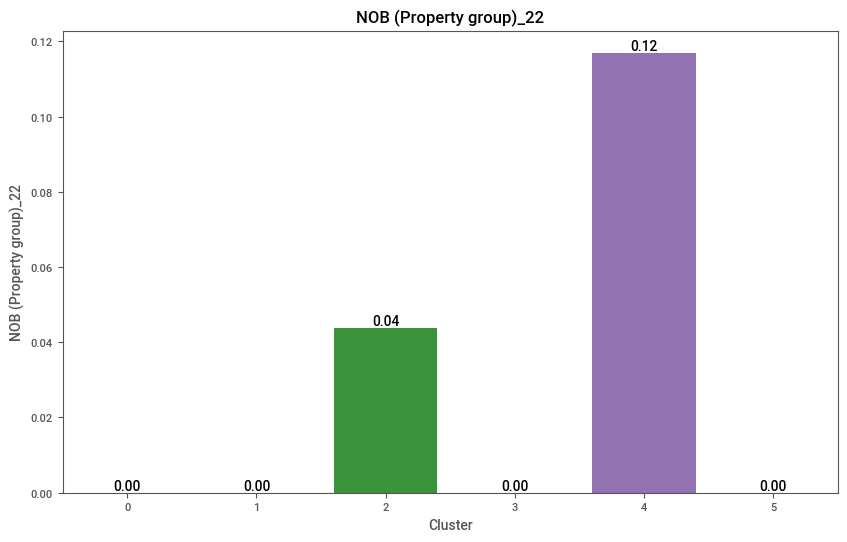

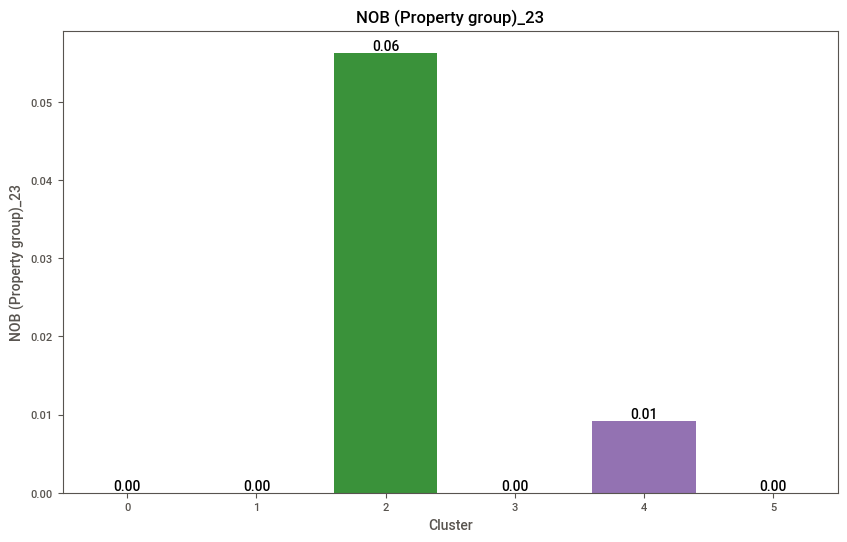

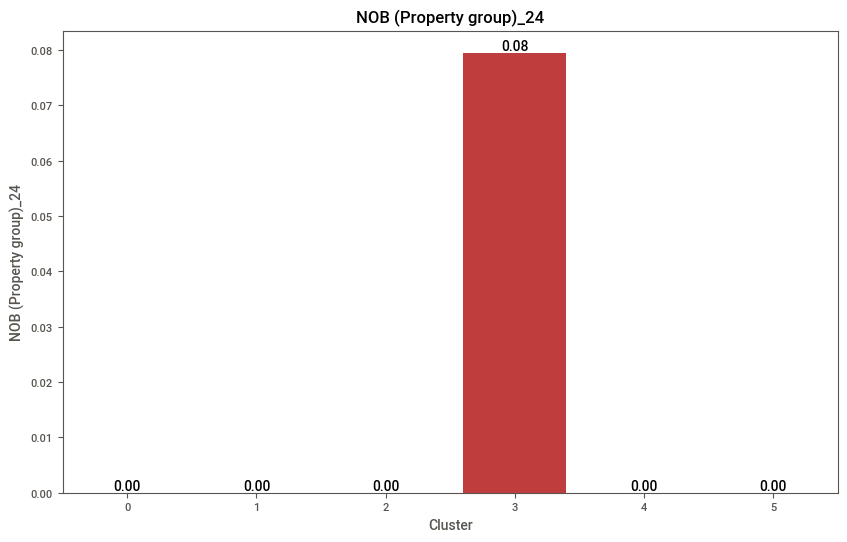

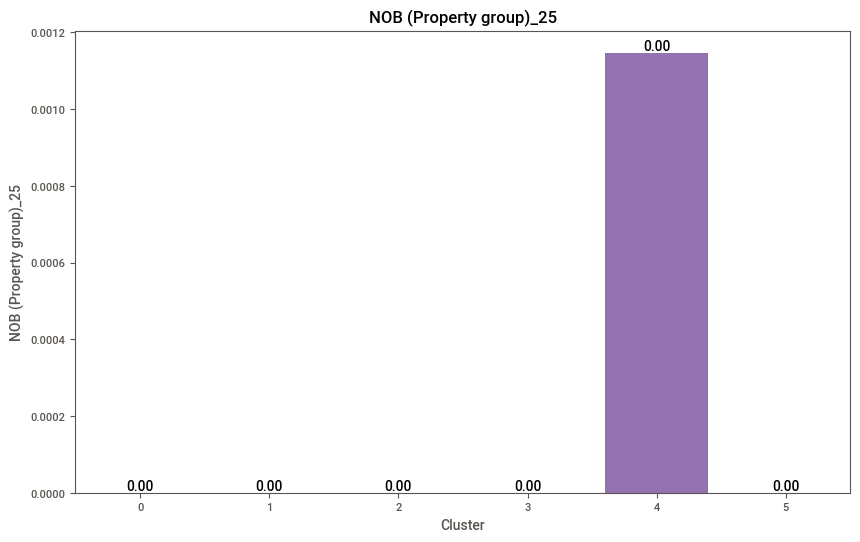

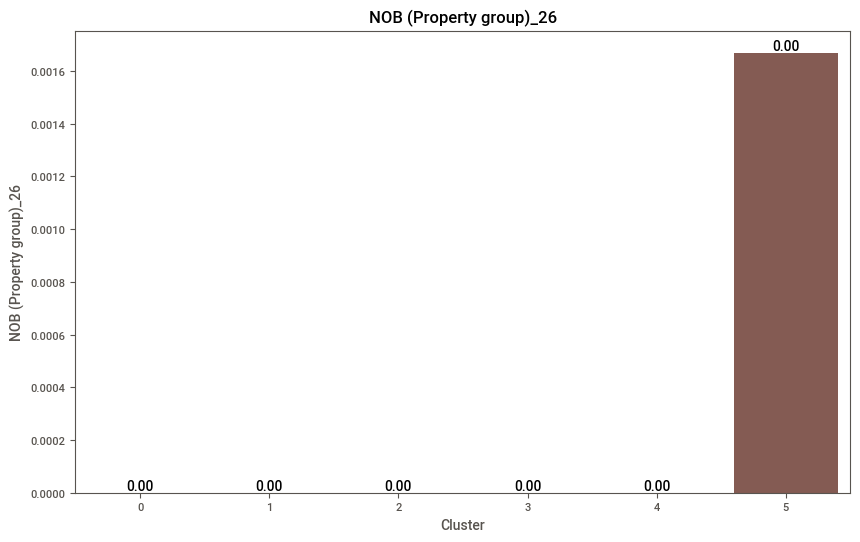

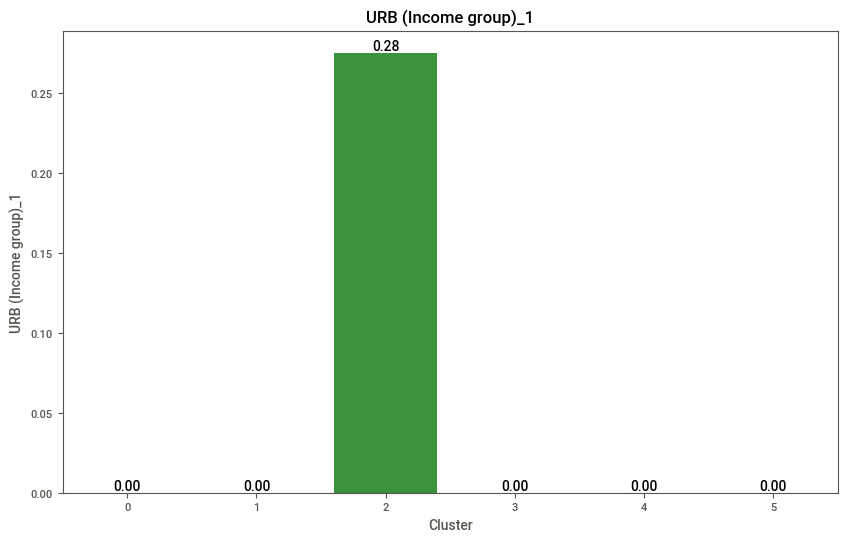

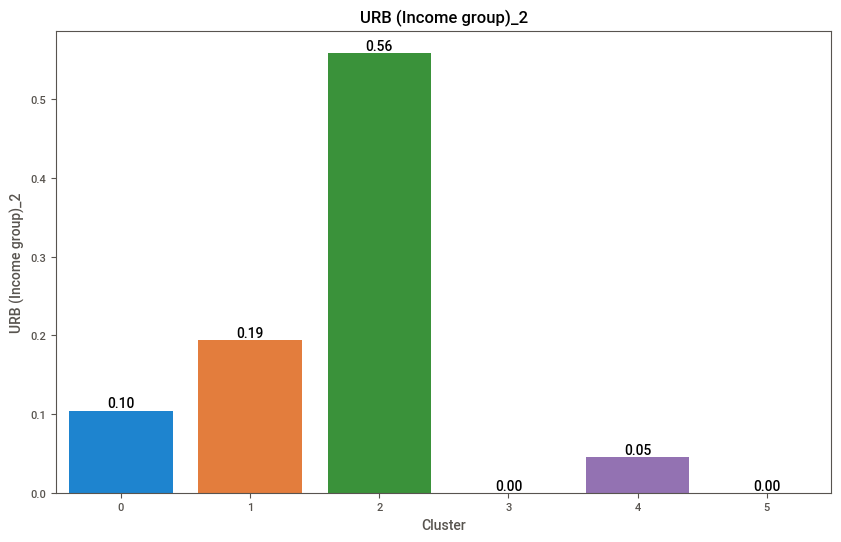

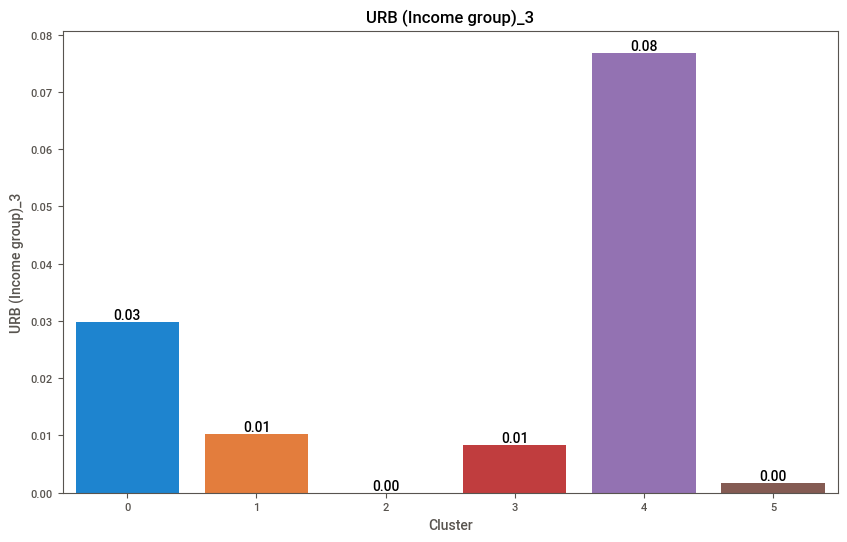

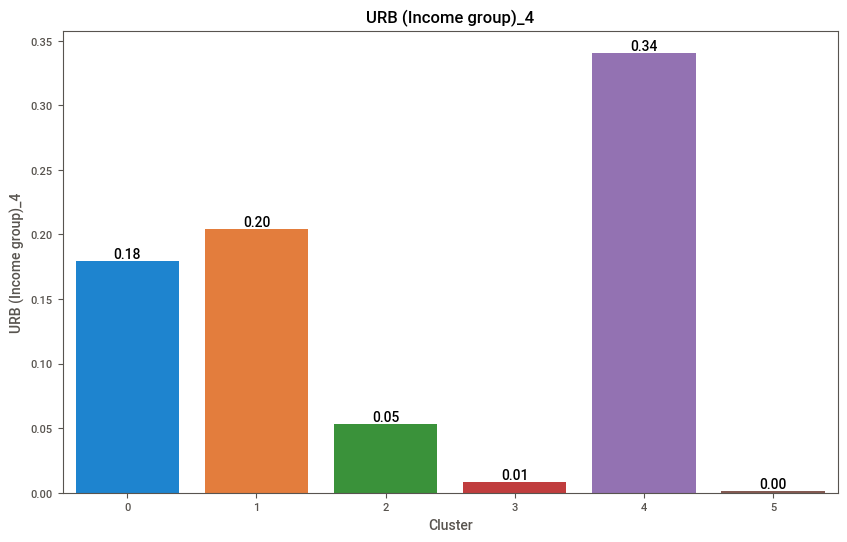

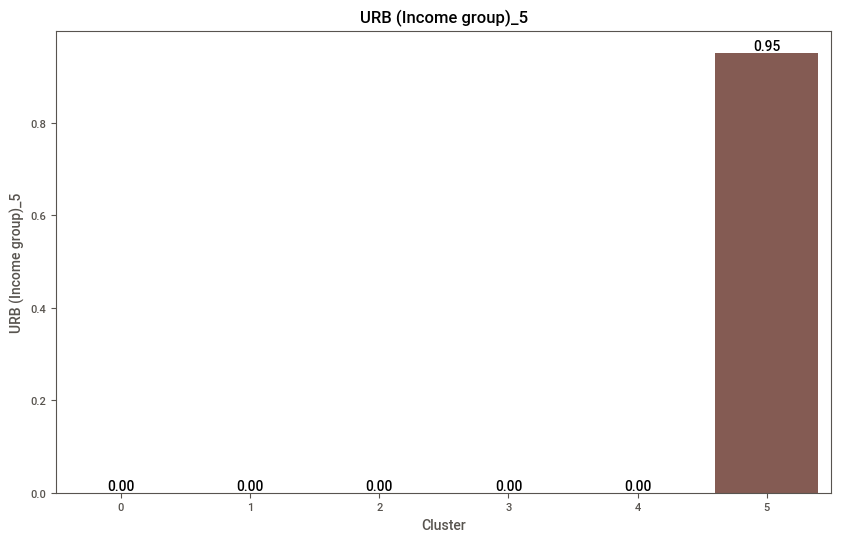

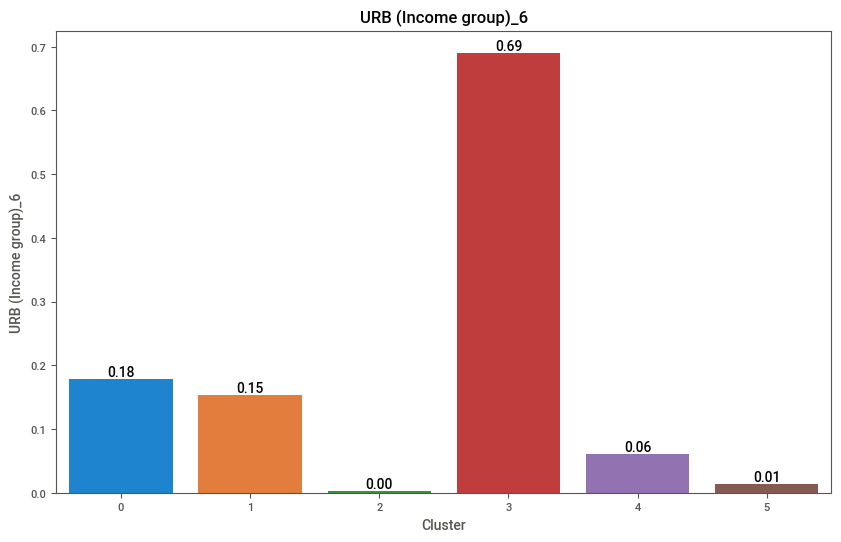

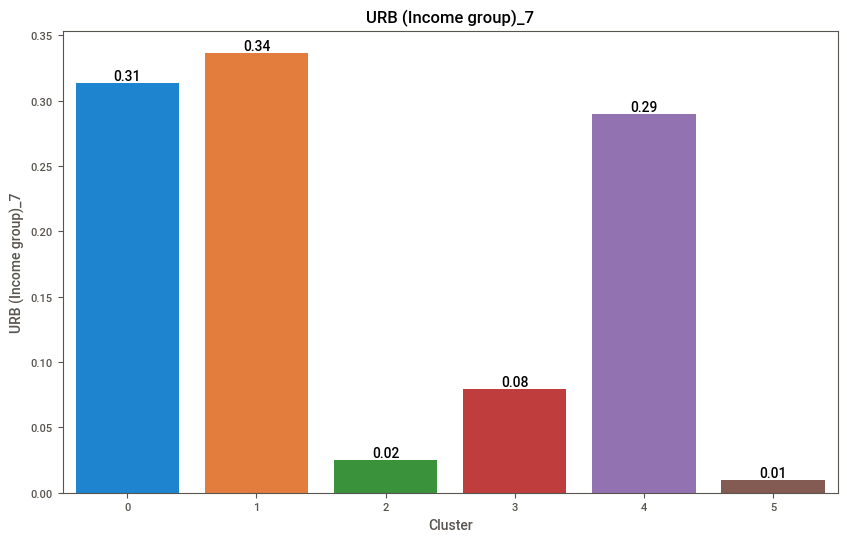

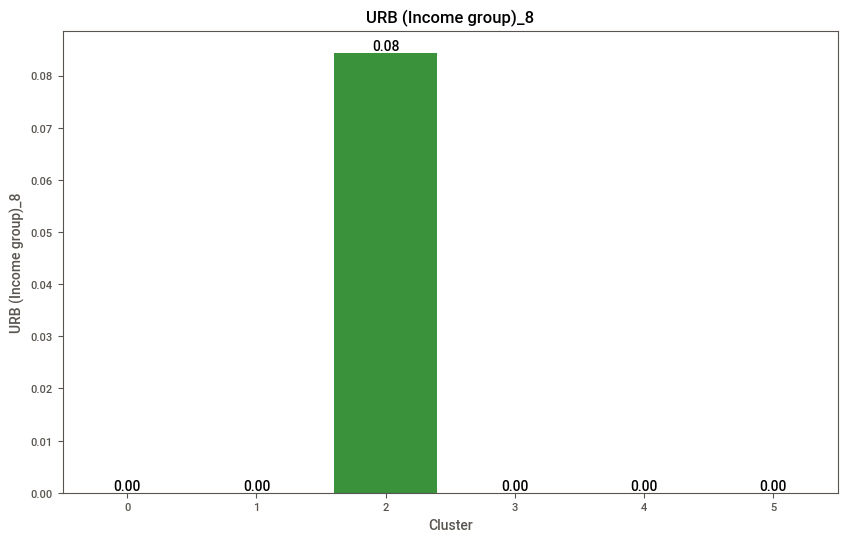

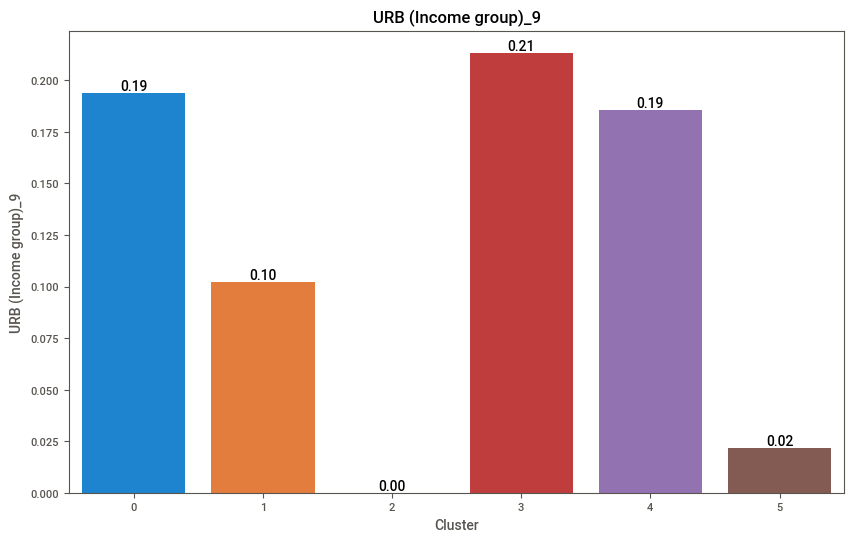

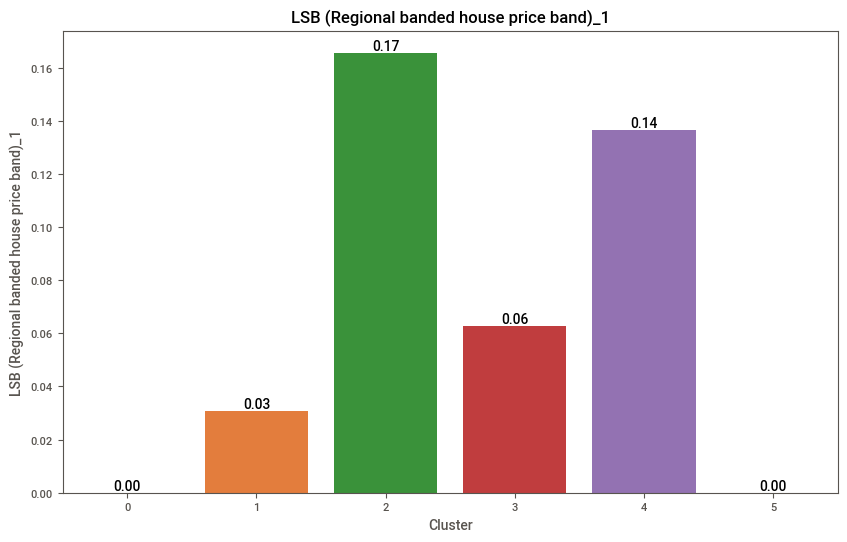

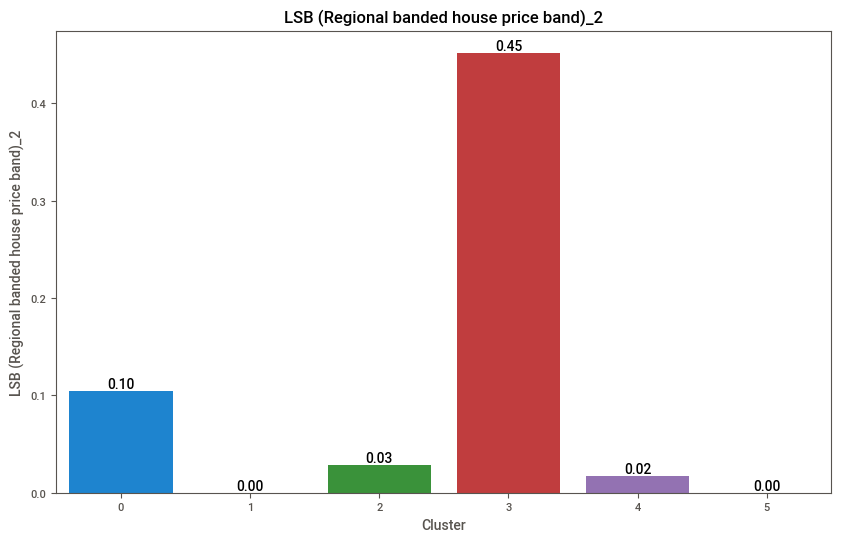

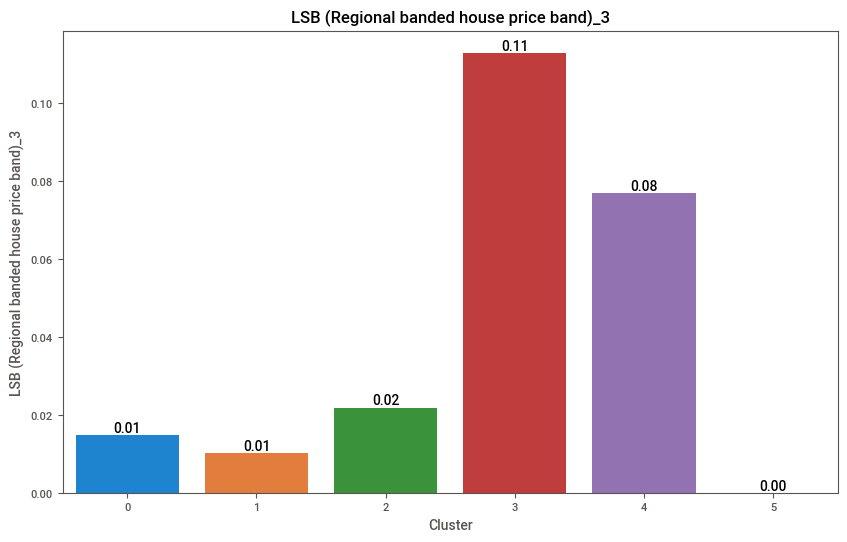

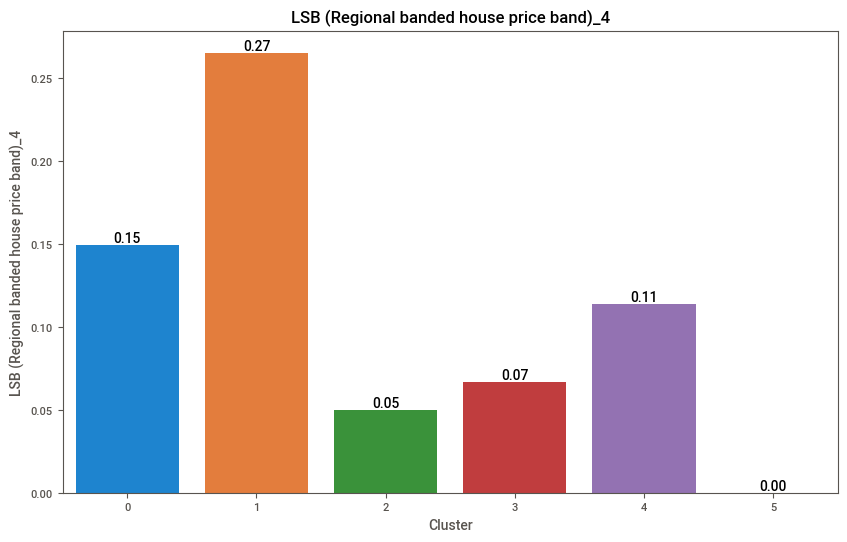

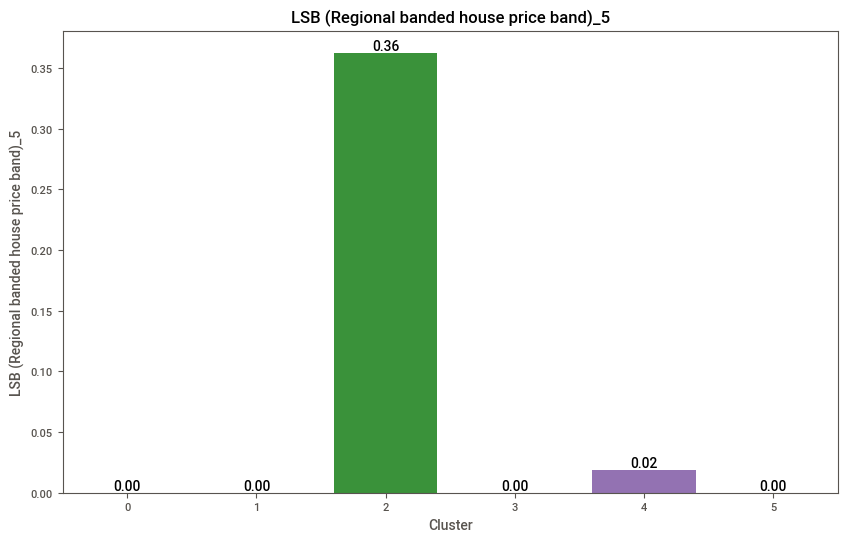

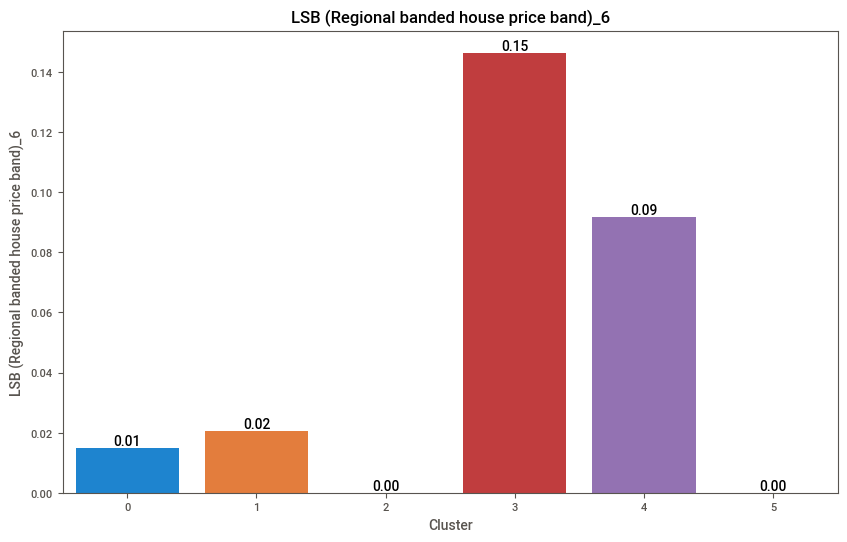

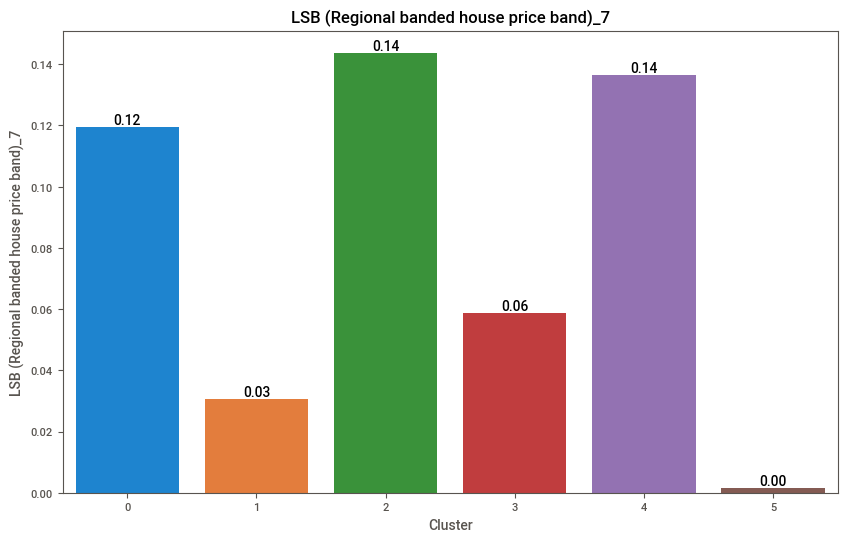

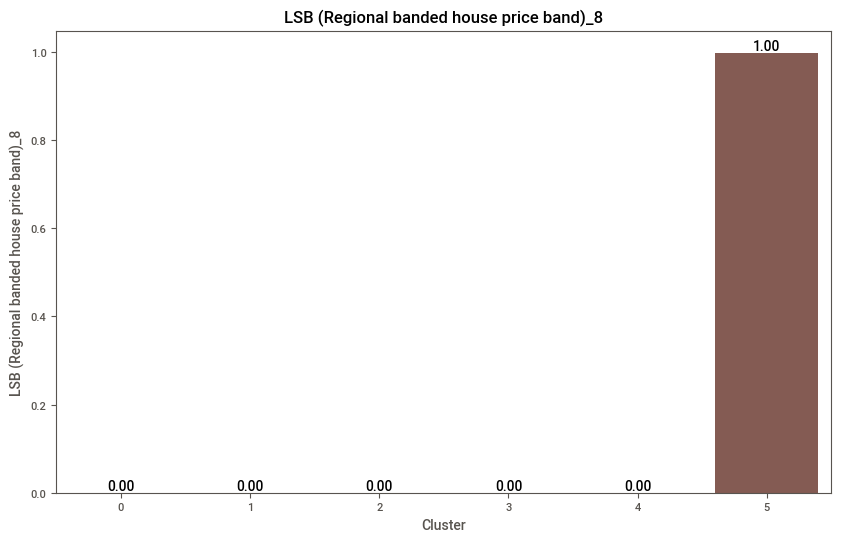

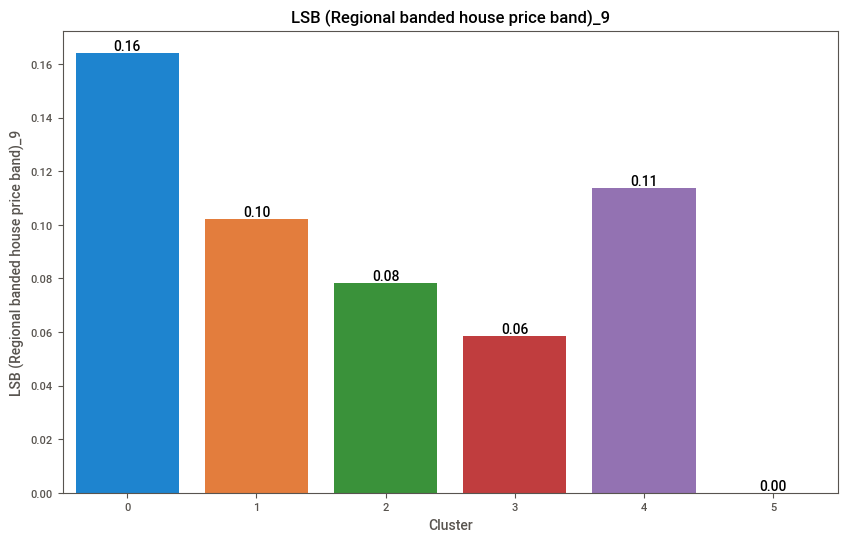

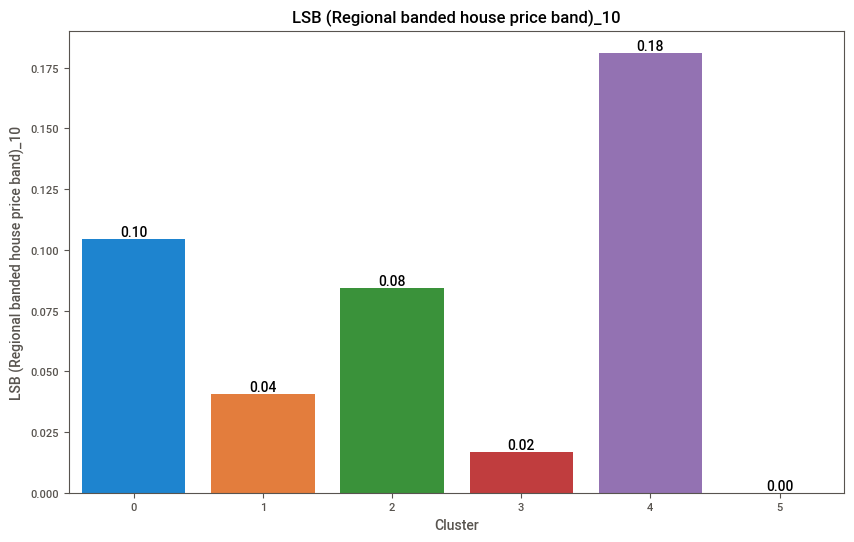

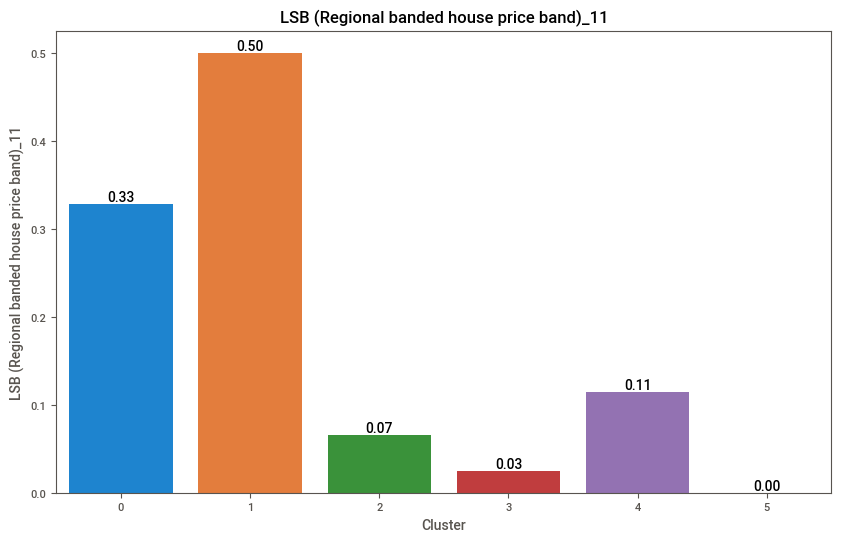

In [ ]:
for feat in cluster_means_unscaled.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the barplot. Note: we use `ax=ax` so we can reference it later
    sns.barplot(
        x=cluster_means_unscaled.index, 
        y=cluster_means_unscaled[feat], 
        ax=ax
    )
    
    # Loop through each bar and add a text label
    for i, bar in enumerate(ax.patches):
        # Get the height (value) of the bar
        height = bar.get_height()
        # Place text at the top of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,   # x-position
            height,                               # y-position
            f"{height:.2f}",                     # text (rounded to 2 decimals)
            ha="center", 
            va="bottom"
        )
    
    ax.set_title(feat)
    plt.show()
